***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Selection-using-Regularization" data-toc-modified-id="Model-Selection-using-Regularization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Selection using Regularization</a></span></li><li><span><a href="#Linear-regression-with-Ridge-regularization" data-toc-modified-id="Linear-regression-with-Ridge-regularization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear regression with Ridge regularization</a></span><ul class="toc-item"><li><span><a href="#Closed-form-solution" data-toc-modified-id="Closed-form-solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Closed-form solution</a></span></li><li><span><a href="#Ridge-regression-at-work" data-toc-modified-id="Ridge-regression-at-work-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ridge regression at work</a></span><ul class="toc-item"><li><span><a href="#Problem-definition-and-data-generation" data-toc-modified-id="Problem-definition-and-data-generation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Problem definition and data generation</a></span></li><li><span><a href="#Visualize-data-and-ground-truth-function" data-toc-modified-id="Visualize-data-and-ground-truth-function-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Visualize data and ground truth function</a></span></li><li><span><a href="#Solve-with-OLS-(unregularized-solution)" data-toc-modified-id="Solve-with-OLS-(unregularized-solution)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Solve with OLS (unregularized solution)</a></span></li><li><span><a href="#Solve-with-Ridge-regression" data-toc-modified-id="Solve-with-Ridge-regression-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Solve with Ridge regression</a></span></li></ul></li></ul></li><li><span><a href="#Linear-regression-with-Lasso-regularization" data-toc-modified-id="Linear-regression-with-Lasso-regularization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear regression with Lasso regularization</a></span><ul class="toc-item"><li><span><a href="#Lasso-regularization-at-work" data-toc-modified-id="Lasso-regularization-at-work-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Lasso regularization at work</a></span></li></ul></li><li><span><a href="#Elastic-Net-regularization:-blending-Ridge-and-Lasso" data-toc-modified-id="Elastic-Net-regularization:-blending-Ridge-and-Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Elastic Net regularization: blending Ridge and Lasso</a></span></li><li><span><a href="#Regularization-at-work:-a-simple-numeric-example" data-toc-modified-id="Regularization-at-work:-a-simple-numeric-example-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regularization at work: a simple numeric example</a></span><ul class="toc-item"><li><span><a href="#Generate--the-data" data-toc-modified-id="Generate--the-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generate  the data</a></span></li><li><span><a href="#OLS-model-with-linear-features:-fit-and-visualization" data-toc-modified-id="OLS-model-with-linear-features:-fit-and-visualization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>OLS model with linear features: fit and visualization</a></span></li><li><span><a href="#A-better-look-into-the-loss-function" data-toc-modified-id="A-better-look-into-the-loss-function-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>A better look into the loss function</a></span></li><li><span><a href="#Squared-norm-of-the-weight-vector--and-weight-selection-(for-Ridge)" data-toc-modified-id="Squared-norm-of-the-weight-vector--and-weight-selection-(for-Ridge)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Squared norm of the weight vector  and weight selection (for Ridge)</a></span></li><li><span><a href="#Ridge-vs.-$\lambda$,-linear-features" data-toc-modified-id="Ridge-vs.-$\lambda$,-linear-features-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Ridge vs. $\lambda$, linear features</a></span></li><li><span><a href="#Ridge-vs.-$\lambda$,-polynomial-features" data-toc-modified-id="Ridge-vs.-$\lambda$,-polynomial-features-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Ridge vs. $\lambda$, polynomial features</a></span></li><li><span><a href="#Lasso-vs.-$\lambda$,-polynomial-features" data-toc-modified-id="Lasso-vs.-$\lambda$,-polynomial-features-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Lasso vs. $\lambda$, polynomial features</a></span></li></ul></li><li><span><a href="#Case-study-with-a-mart-sales-dataset" data-toc-modified-id="Case-study-with-a-mart-sales-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Case study with a mart sales dataset</a></span><ul class="toc-item"><li><span><a href="#Impute-numerical-features" data-toc-modified-id="Impute-numerical-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Impute numerical features</a></span></li><li><span><a href="#Impute-categorical-features" data-toc-modified-id="Impute-categorical-features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Impute categorical features</a></span></li><li><span><a href="#Convert-categorical-to-numeric-features" data-toc-modified-id="Convert-categorical-to-numeric-features-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Convert categorical to numeric features</a></span><ul class="toc-item"><li><span><a href="#Drop-categories-that-would-generate-too-many-binary-features" data-toc-modified-id="Drop-categories-that-would-generate-too-many-binary-features-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Drop categories that would generate too many binary features</a></span></li><li><span><a href="#Transform-by-one-hot-encoding" data-toc-modified-id="Transform-by-one-hot-encoding-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Transform by one-hot encoding</a></span></li></ul></li><li><span><a href="#Train-a--linear-regression-model" data-toc-modified-id="Train-a--linear-regression-model-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train a  linear regression model</a></span></li><li><span><a href="#Test-the-linear-regression-model" data-toc-modified-id="Test-the-linear-regression-model-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Test the linear regression model</a></span></li><li><span><a href="#Residuals-and-Heteroskedasticity" data-toc-modified-id="Residuals-and-Heteroskedasticity-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Residuals and Heteroskedasticity</a></span></li><li><span><a href="#Feature-weights" data-toc-modified-id="Feature-weights-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Feature weights</a></span></li><li><span><a href="#Ridge-regression-at-work" data-toc-modified-id="Ridge-regression-at-work-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Ridge regression at work</a></span></li><li><span><a href="#Lasso-regression-at-work" data-toc-modified-id="Lasso-regression-at-work-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>Lasso regression at work</a></span></li><li><span><a href="#Elastic-Net-regression-at-work" data-toc-modified-id="Elastic-Net-regression-at-work-6.10"><span class="toc-item-num">6.10&nbsp;&nbsp;</span>Elastic Net regression at work</a></span></li></ul></li></ul></div>

# Model Selection using Regularization
<font size="+0.2">
    
<u>Regularized loss function,</u> $\ell^R({\bf w})$
</font>

<div>
  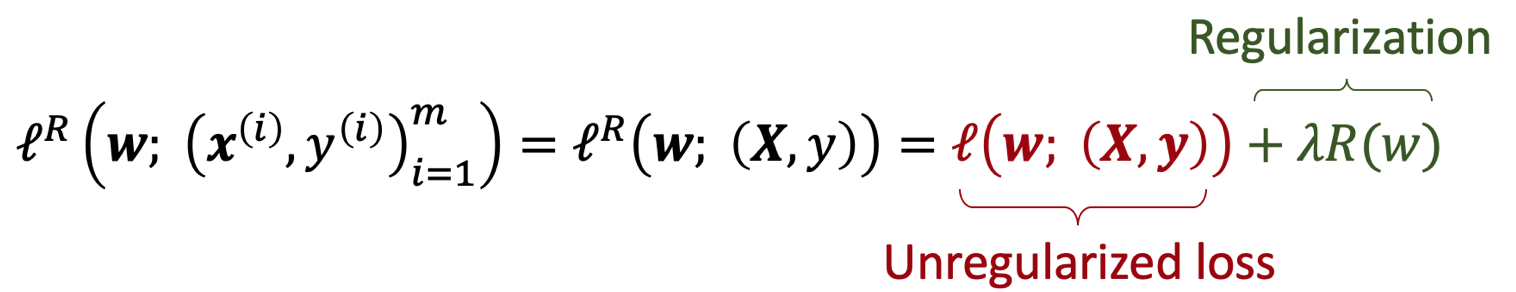
</div>


<font size="+0.2">
    
- The loss function $\ell$ is a measure of model-fit on the training data <br><p>

- The regularizer $R({\bf w})$, weighted by the parameter $\lambda$, **prevents the model from becoming too complex** by:<br><p>
    - <font style="color:red">penalizing weight values that are large,</font> such that weights do not get large values <u>if not strictly necessary for minimizing the loss </u>(main role of $R({\bf w})$);<br><p>
    - <font style="color:red">*possibly* bringing to zero weights that are very small.</font><br><p>
    
- Regularization is particularly important for small $m$, large feature spaces
</font>

<font size="+0.2">
Popular way of implementing the function $R({\bf w})$:

$$\color{blue}{\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 +  \lambda \sum_{j=1}^d |w_j|^q,} \quad \lambda, q > 0$$
 </font>

# Linear regression with Ridge regularization

<font style="font-size:130%">
<br><p>
<font style="color:red">$q = 2$, Euclidean distance: </font>
    
$$\begin{aligned}
\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d w_j^2 = \\
\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d {\bf w}^T {\bf w}, \quad \lambda \ge 0
\end{aligned}
$$
 </font>

<font style="font-size:130%">
<br><p>
<font style="color:red"> <i>Ridge</i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}} \ell^R = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} + 
\color{blue}{\lambda \sum_{j=1}^d w_j^2}\Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>
 <br><p>

<font size="+0.2">
    
- <u>Effect:</u>  In the calculation of the minimum, **all non-zero weights are penalized by a cost factor $\lambda$ (shrinkage coefficient)**<br><p>

- A candidate weight vector ${\bf w}$, provides to the *loss function* $\ell^R$:<br><p>
    
    - a <u style="color:green">positive contribution</u>, $\color{green}{\ell^+({\bf w})}$, based on how much it determines a good fit to the training data, by minimizing the MSE<br><p>
  
    - a <u style="color:blue">negative contribution</u>, $\color{blue}{\ell^-({\bf w})}$,  based on its squared $L_2$ norm, the higher the more negative, scaled by the penalty factor $\color{blue}{\lambda}$.<br><p>
    
    - The <u>Ridge-optimal weight vector</u> is the vector ${\bf w}^*$ that **best balances its positive and negative contributions in terms of minimizing the total loss:**
    
    $${\bf w}^* = \arg\min_{{\bf w}} \Big[ \color{green}{\ell^+({\bf w})} + \color{blue}{\lambda\ \ell^-({\bf w})} \Big].$$ 
    
</font>

<font size="+0.2">
<font style="color:red"><u>$\lambda$ controls the shrinkage of the weights:</u> the larger the value of $\lambda$ the greater the amount of shrinkage </font><br> (and the more the coefficients become robust to issues of collinearity).
</font>

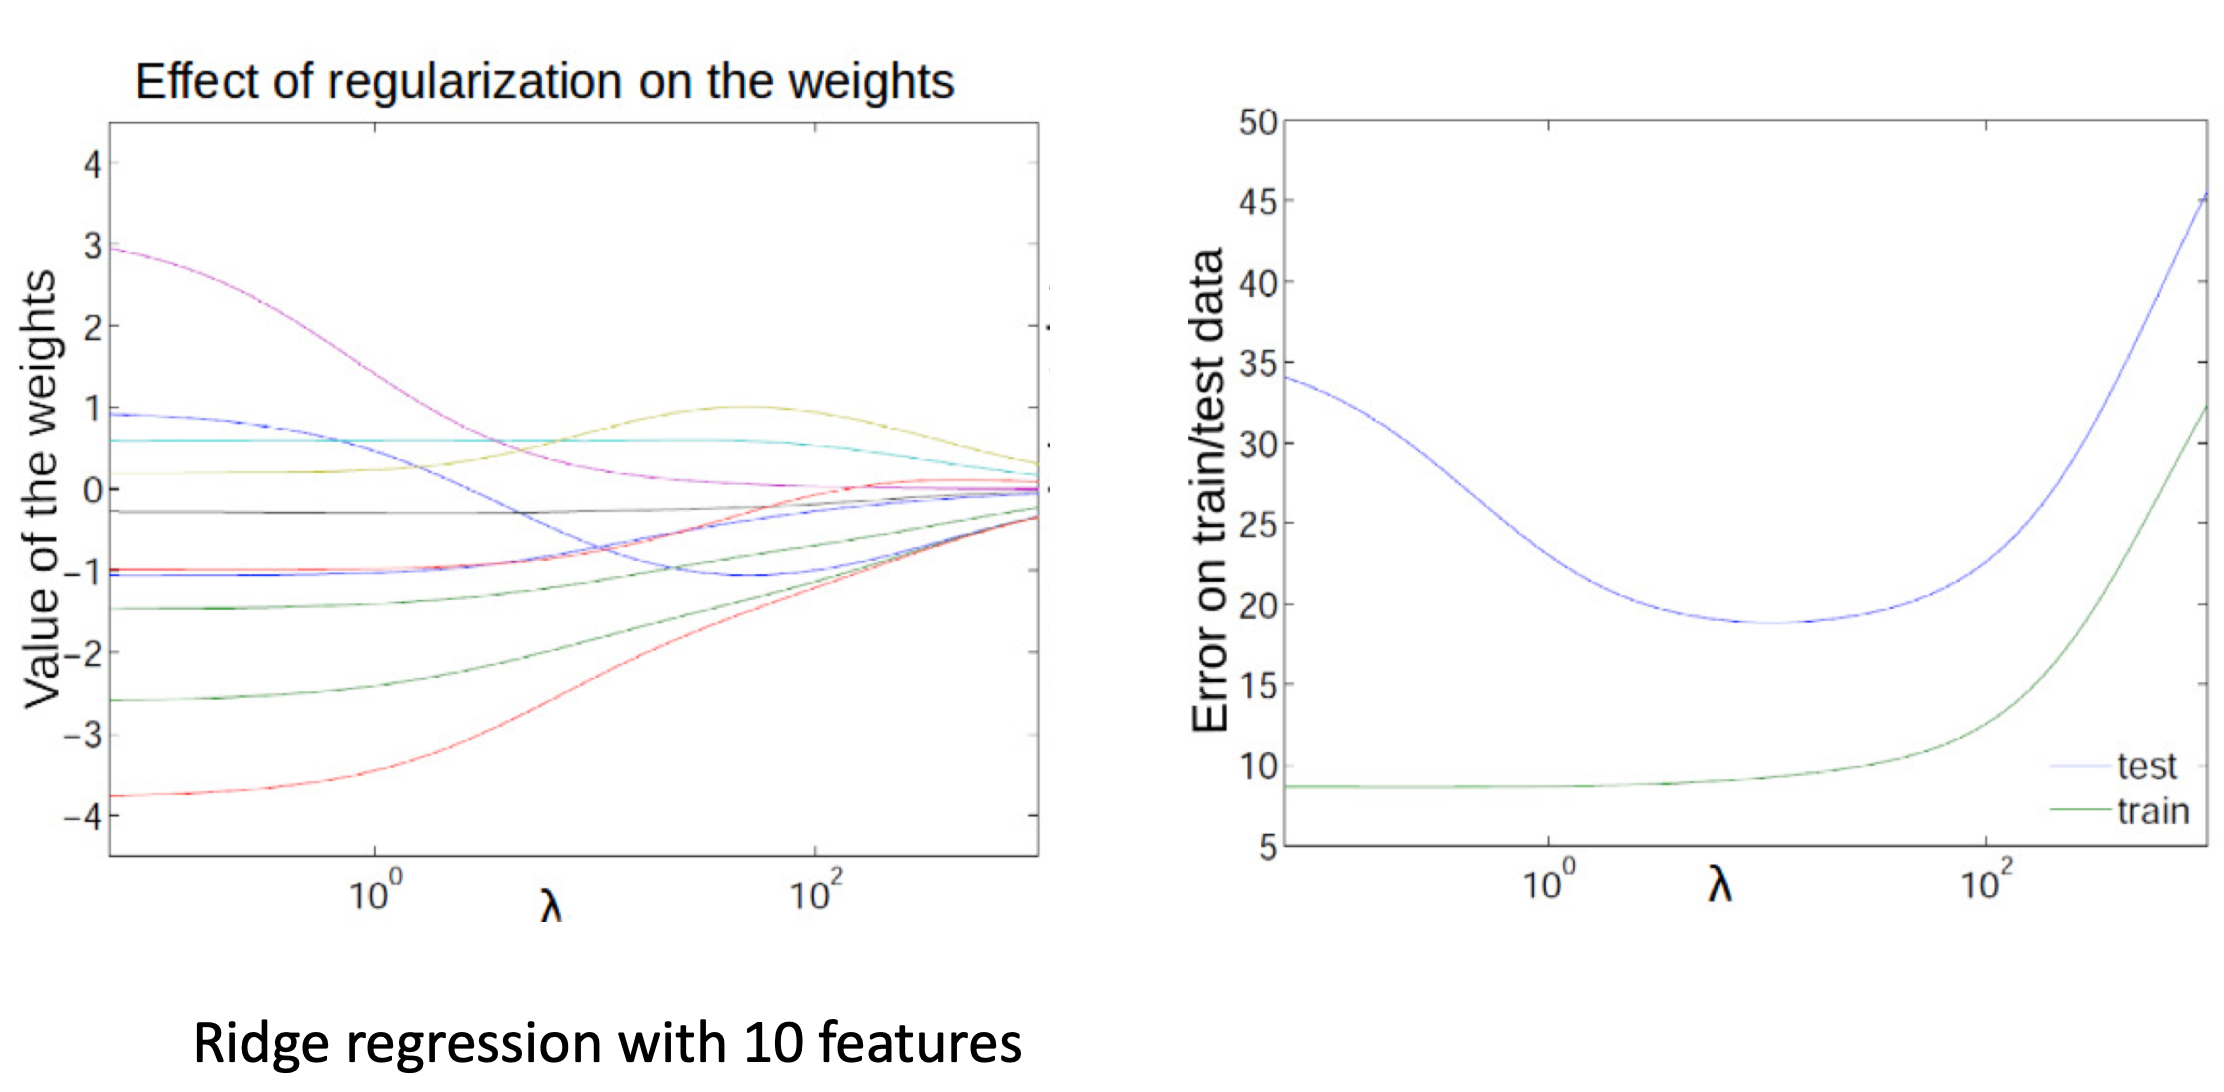

## Closed-form solution
<br>

<div>
  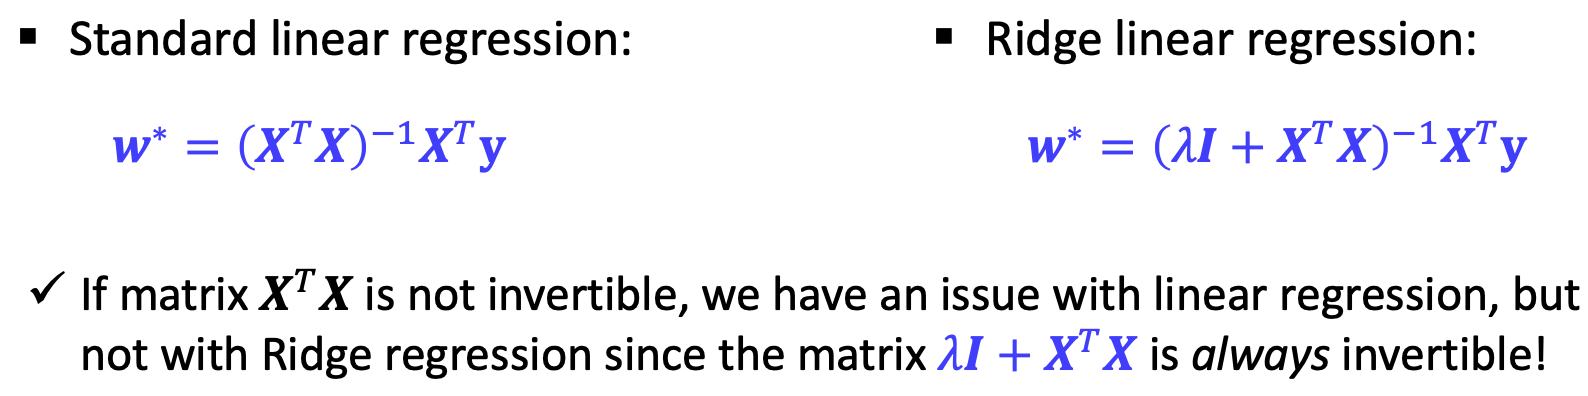
</div>

<span style="font-size:120%; text-align:middle">
Regression with polynomial features on a small dataset: Unregularized and Ridge-regularized solutions
</span><br>

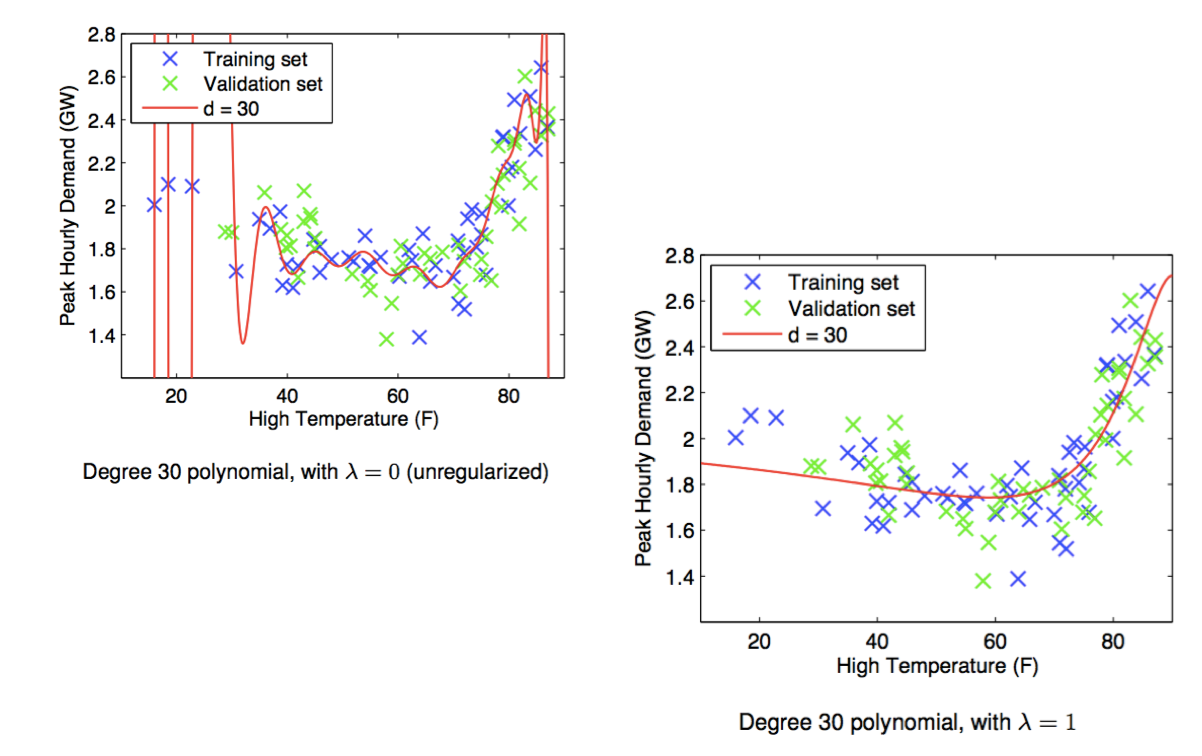

<span style="font-size:130%; text-align:middle">
Ridge regression with polynomial features, 9 example points, polynomial of degree 7, various $\lambda$
</span><br>

<div>
  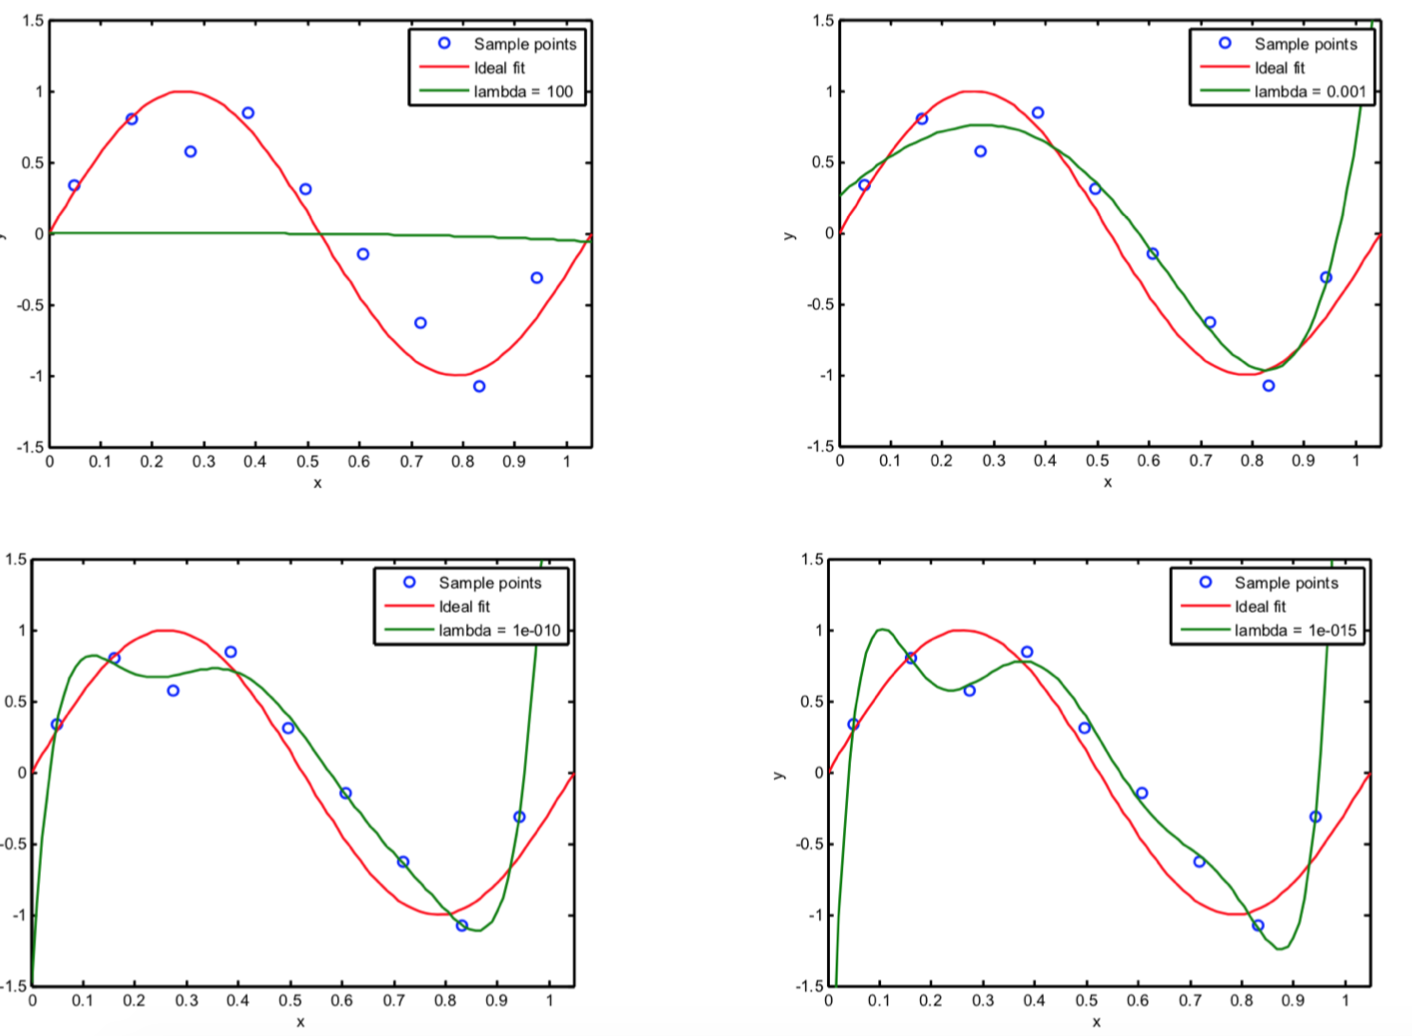
</div>

<span style="font-size:130%; text-align:middle">
OLS solutions, polynomial features of degree 3 and 5
</span><br>

<div>
  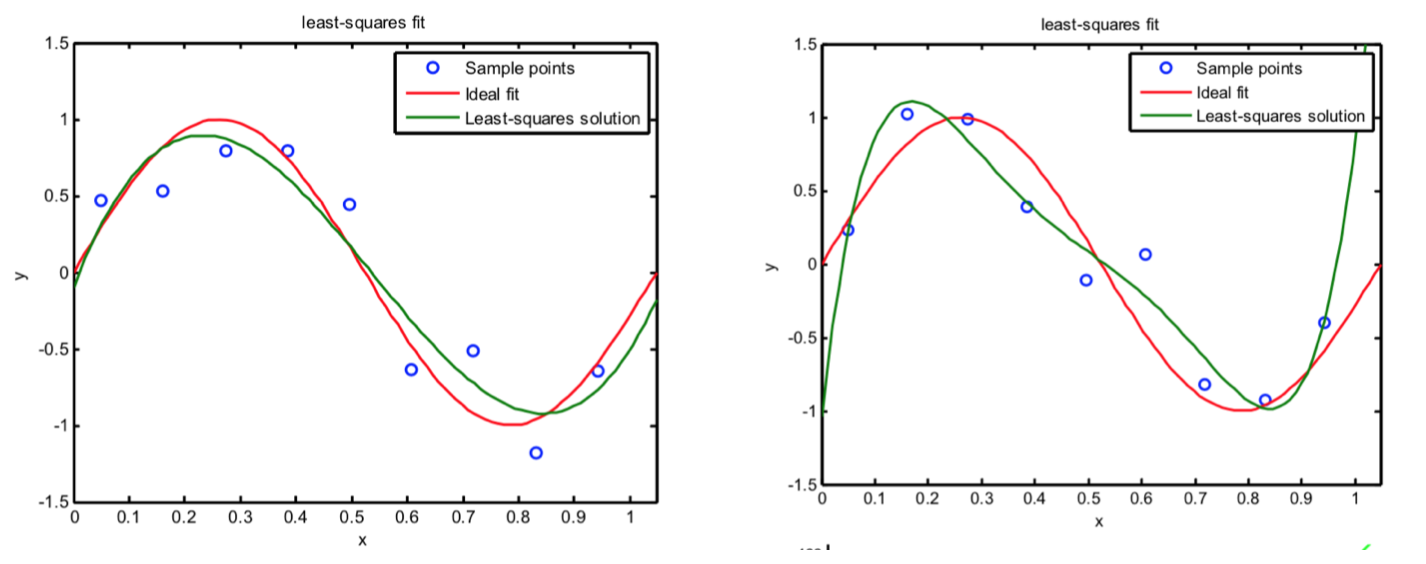
</div>

## Ridge regression at work

### Problem definition and data generation

<font size="+0.2">

<u>Numeric Example:</u>

- Let's consider a dataset $D=\{X, Y\}$ consisting of $n$ data samples generated out of a univariate polynomial $y = p(x)$ of order 3:

$$ p(x) = c_0 x^3 + c_1 x^2 + c_2 x + c_3 $$

- The specific coefficients of the ground truth model are:

$${\bf c} = [1,\ -23.0,\ 25.0,\ 0.5]$$

- Feature values $x\in X$ range in $[xmin,\ xmax]$, and are sampled uniformly in the interval<br><p>
    
- In the dataset $D$, each data point $p(x)\in Y$ is *corrupted* by some relatively large Gaussian noise, $N(\sigma, \mu)$, where $\sigma$ is a function of $[xmin,\ xmax]$<br><p>
</font>


In [82]:
# let's make the basic imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

In [48]:
# these are just utility functions that make a pretty printing of the polynomial
# and they also shows how to produce a formatted output from a python program!
#
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

def print_poly_fmt(poly_object):
    c = poly_object.c
    d = len(c)-1 
    poly_str = '**Polynomial function:** ${:.2f}x^{}'.format(c[0], d)
    for cc in c[1:]:
        d -=1 
        if d != 0:
            poly_str += ' {} {:.2f}x^{}'.format('+' if cc > 0 else '', cc, d)
        else:
            poly_str += ' {}{:.2f}$'.format('+' if cc > 0 else '-', cc)
    printmd(poly_str)     

In [83]:
# here we generate the data

np.random.seed(999)

n_samples = 100

# sample features points x in a random uniform way between xmin and xmax
xmin = -2#-8
xmax =  5 #20
X = xmin + (xmax-xmin) * np.random.random(size=(n_samples,1))

# coefficient of the polynomial defining the ground truth function
#coeff = [0.5, -0.8, -0.40, -12, -250, -50, +5]
coeff = [1., -2.3, 2.5, 0]


# create a 1D polynomial object of degree len(c), and with coefficients c
# note that the constant term of the polynomial corresponds to c[len(c)-1]
#
polynomial = np.poly1d(coeff)

#print('Polynomial function:\n {}\n'.format(polynomial))
#print(polynomial)
print_poly_fmt(polynomial)  

y = polynomial(X.ravel())

ymax = y.max()
ymin = y.min()

# apply a std which depend on the value range
sigma = 0.05 * abs(ymax - ymin)
mu = 1
#print(sigma, mu)

Y_targets = y  + (sigma * np.random.randn(n_samples) + mu)

#print('Clean poly values: {}'.format( [round(yy, 2) for yy in y] ))
#print('Y target values: {}'.format( [round(yt, 2) for yt in Y_targets] ))
#print('X feature values:', X)

**Polynomial function:** $1.00x^3  -2.30x^2 + 2.50x^1 -0.00$

### Visualize data and ground truth function

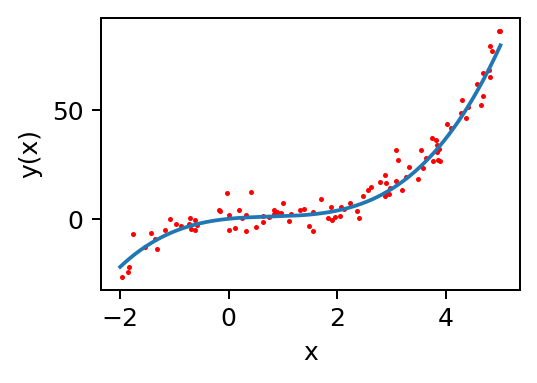

In [84]:
# plot ground truth and data samples

fig = plt.figure('ref', figsize=(3,2))
data_plt = fig.add_subplot(1,1,1)

# plot the ground truth function
x_plot = np.linspace(xmin, xmax, 1000)
data_plt.plot(x_plot, polynomial(x_plot))

# plot the data
data_plt.scatter(X, Y_targets, s=1, c='r')

data_plt.set_xlabel('x')
data_plt.set_ylabel('y(x)')
plt.show()

### Solve with OLS (unregularized solution)

In [85]:
from sklearn import linear_model 

# Create OLS linear regression object
OLS = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
OLS.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(OLS.coef_[0], OLS.intercept_))

Model Coefficients: 10.57 -4.00



In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(Y_targets, OLS.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             OLS.predict(X))))

Mean Squared Error: 153.27
Coefficient of determination: 0.74


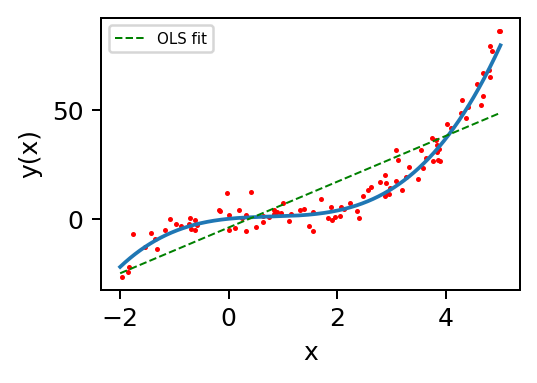

In [87]:
# plot the linear regression fit

data_plt.plot(x_plot, OLS.intercept_ + (OLS.coef_[0]) * x_plot, 
              c='g', linestyle='--', linewidth=0.8, label='OLS fit')

data_plt.legend(fontsize=6)
fig

### Solve with Ridge regression

In [88]:
from sklearn import linear_model 

# Create Ridge linear regression object
penalty = 150
Ridge = linear_model.Ridge(penalty)

# Train the model using the training sets
Ridge.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(Ridge.coef_[0], Ridge.intercept_))

Model Coefficients: 7.68 1.33



In [89]:
# Make predictions using the test set

MSE = mean_squared_error(Y_targets, Ridge.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             Ridge.predict(X))))

Mean Squared Error: 186.59
Coefficient of determination: 0.69


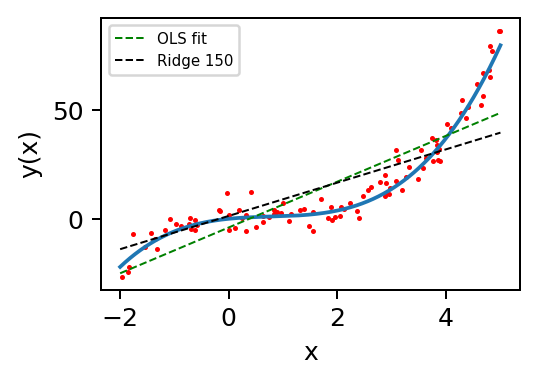

In [90]:
# plot the linear regression fit

data_plt.plot(x_plot, Ridge.intercept_ + (Ridge.coef_[0]) * x_plot, 
              c='black', linestyle='--', linewidth=0.8, label='Ridge {}'.format(penalty))

data_plt.legend(fontsize=6)
fig

# Linear regression with Lasso regularization
<br>

<font size="+0.2">
    
Ridge regularization can shrink the weights but not really *prune* them (i.e., bring them to zero). 

Lasso (Least Absolute Shrinkage Selector Operator) regularization is more aggressive in this respect and can be used when we search for solutions with **fewer non-zero weights,** effectively reducing the number of features upon the given solution is dependent. 

In particular, all weights between [−1,1] are pushed harder to zero than in the L2 norm case.
    
**Lasso favors a <i>sparse</i> solution in terms of features / weights**
</font>

<font style="font-size:130%">

<font style="color:red">$q = 1$, Manhattan distance:</font>
    
$$\begin{aligned}
\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d |w_j|,\quad \lambda \ge 0
\end{aligned}
$$
 </font>

<font style="font-size:130%">
<br><p>
<font style="color:red"> <i>Lasso</i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} +
\color{maroon}{\lambda \sum_{j=1}^d |w_j|}\Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>
 <br><p>

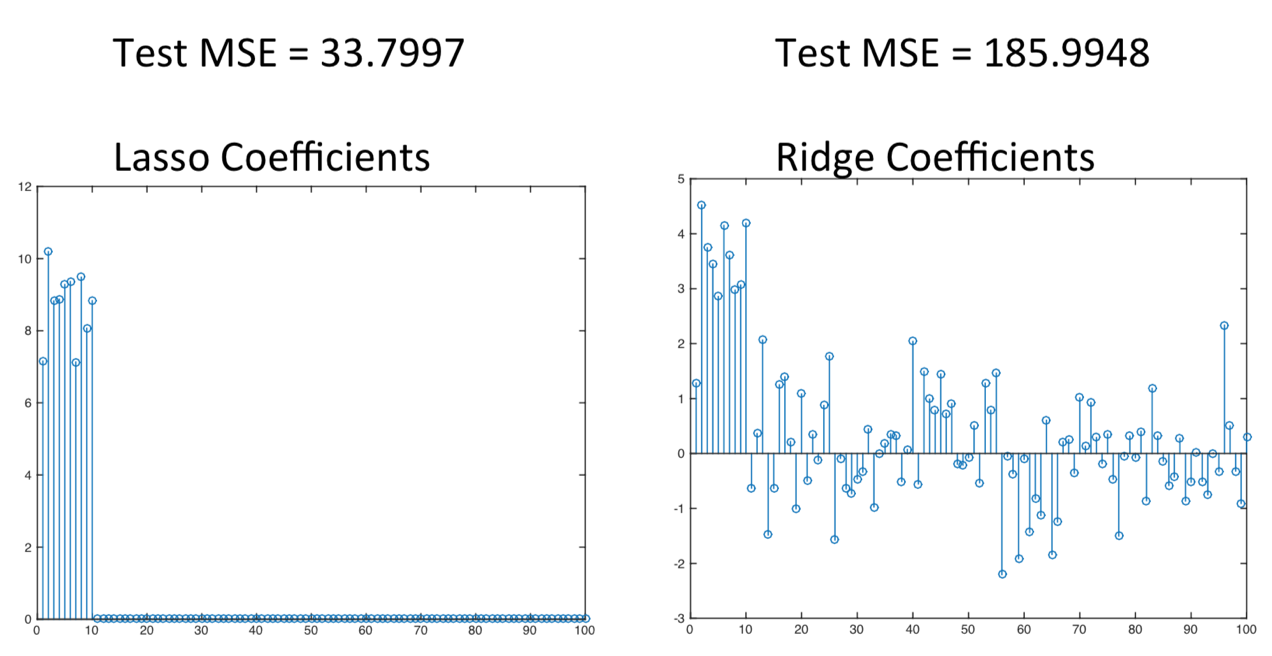

## Lasso regularization at work

In [91]:
from sklearn import linear_model 

# Create Lasso linear regression object
penalty = 50
Lasso = linear_model.Lasso(penalty)

# Train the model using the training sets
Lasso.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(Lasso.coef_[0], Lasso.intercept_))

Model Coefficients: 0.00 15.46



In [92]:
# Make predictions using the test set

MSE = mean_squared_error(Y_targets, Lasso.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             Lasso.predict(X))))

Mean Squared Error: 598.37
Coefficient of determination: 0.00


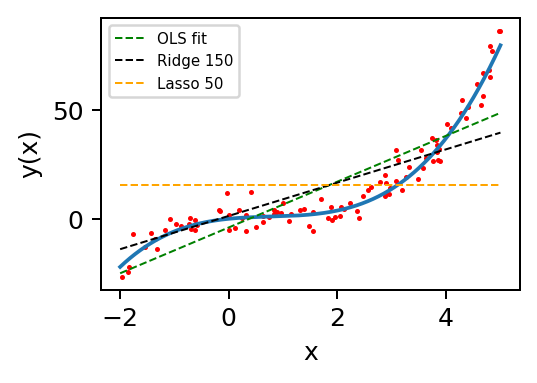

In [93]:
# plot the linear regression fit

data_plt.plot(x_plot, Lasso.intercept_ + (Lasso.coef_[0]) * x_plot, 
              c='orange', linestyle='--', linewidth=0.8, label='Lasso {}'.format(penalty))

data_plt.legend(fontsize=6)
fig

# Elastic Net regularization: blending Ridge and Lasso

<font style="font-size:130%">
    
Which one to choose? Ridge or Lasso? Why not both!<br>

**Elastic net** is a regularized regression method that **linearly combines the $L_1$ and $L_2$ penalties of the Lasso and Ridge methods.**
    
</font>

<font style="font-size:130%">

<font style="color:red"> <i>Elastic Net<i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} +
\color{maroon}{\lambda_1 \sum_{j=1}^d |w_j|} +
\color{blue}{\lambda_2 \sum_{j=1}^d w_j^2} \Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>

# Regularization at work: a simple numeric example

Numeric Example:

- Let's consider a small dataset $D$ consisting of data generated out of a univariate polynomial $p(x)$ of order 3:

$$ p(x) = c_0 x^3 + c_1 x^2 + c_2 x + c_3 $$

- The specific coefficients of the ground truth model are:

$${\bf c} = [1.2,\ 5.0,\ 12,\ 1]$$

- In the dataset $D$, each data point point $p(x)$ is *corrupted* by some relatively large Gaussian noise, $N(\sigma, \mu)$<br><p>
 
- Feature values $x$ range in $[0,1]$<br><p>

- $D$ consists of 5 examples


## Generate  the data

In [178]:
c = [1.2, 5.0, -12, 1]

np.random.seed(99)
n_samples = 5

X = np.random.random(size = (n_samples,1))

# create a 1D polynomial object of degree len(c), and with coefficients c
# note that the constant term of the polynomial corresponds to c[len(c)-1]
#
polynomial = np.poly1d(c)

#print('Polynomial function:\n {}\n'.format(polynomial))
#print(polynomial)
print_poly_fmt(polynomial)  


y = polynomial(X.ravel())

sigma = 1.5
mu = 0.5
Y_targets = y + (sigma * np.random.randn(n_samples) + mu)

#print('Clean poly values: {}'.format( [round(yy, 2) for yy in y] ))
#print('Y target values: {}'.format( [round(yt, 2) for yt in Y_targets] ))
print('X feature values:', X)

**Polynomial function:** $1.20x^3 + 5.00x^2  -12.00x^1 +1.00$

X feature values: [[0.67227856]
 [0.4880784 ]
 [0.82549517]
 [0.03144639]
 [0.80804996]]


## OLS model with linear features: fit and visualization

In [179]:
from sklearn import linear_model 

# Create OLS linear regression object
OLS = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
OLS.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(OLS.coef_[0], OLS.intercept_))

Model Coefficients: -10.26 2.99



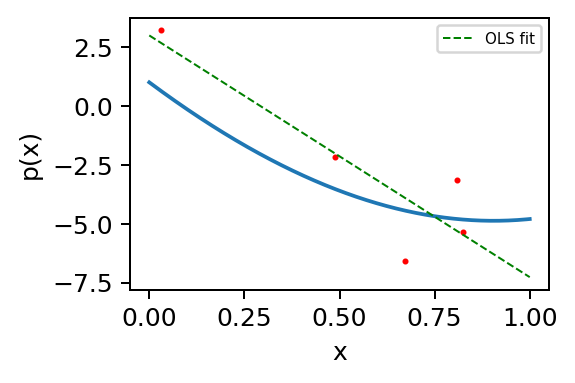

In [181]:
plt.figure(figsize=(3,2))

# plot the ground truth function
xmin = 0
xmax = 1
x_plot = np.linspace(xmin, xmax, 1000)
plt.plot(x_plot, polynomial(x_plot))

# plot the data
plt.scatter(X, Y_targets, s=2, c='r')

# plot the linear regression fit
plt.plot(x_plot, OLS.intercept_ + (OLS.coef_[0]) * x_plot, 
        c='g', linestyle='--', linewidth=0.8, label='OLS fit')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(fontsize=6)
plt.show()

## A better look into the loss function

<font size="+1.2">
    
$$\ell({\bf w}; X, Y) = \sum_{i=1}^5 \Big(y^{(i)} - {\bf w}^T {\bf x}^{(i)}\Big)^2$$
   
</font>

In [182]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_targets, OLS.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))


Mean Squared Error: 2.44


<font size="+1.2">
$$
\begin{aligned}
%
&\begin{aligned}
\ell =\ & (-6.58 - (w_0 + w_1 0.67))^2\ +\\ 
&(-2.17 - (w_0 + w_1 0.49))^2\ +\\
&(-5.35 - (w_0 + w_1 0.83))^2\ +\\
&(3.2 - (w_0 + w_1 0.03))^2\ +\\
&(-3.12 - (w_0 + w_1 0.81))^2 
\end{aligned}
%
&\begin{aligned}
\ell =\ & (-6.58 - (-1.96 - 3.35\times 0.67))^2\ +\\ 
&(-2.17 - (-1.96 - 3.35\times 0.49))^2\ +\\
&(-5.35 - (-1.96 - 3.35\times 0.83))^2\ +\\
&(3.2 - (-1.96 - 3.35\times 0.03))^2\ +\\
&(-3.12 - (-1.96 - 3.35\times 0.81))^2 
\end{aligned}
\end{aligned}
$$
</font>

## Squared norm of the weight vector  and weight selection (for Ridge)

<font size="+1.2">
    
$$|| {\bf w} ||^2_{L_2} = \sum_{n=1}^2 w_n^2 = w_0^2 + w_1^2 =  (-1.96)^2 + (-3.35)^2 = 3.84 + 11.22 = 15.06 $$

$$\ell^{Ridge} = \lambda || {\bf w} ||^2_{L_2} = \lambda (w_0^2 + w_1^2)$$
    
</font>

<font size="+1.2">
    
$$\ell^R = \ell({\bf w}; X, Y) + \ell^{Ridge}({\bf w}) = 1.9 + \lambda\cdot 15.1 $$
    
</font>

In [183]:
w = np.array( [OLS.intercept_, OLS.coef_[0] ] )
regularization_val = np.power( np.linalg.norm(w), 2)
regularization_val

114.13733070489627

In [184]:
w0 = OLS.intercept_
w1 = OLS.coef_[0]+1

MSE = np.sum ( (Y_targets - (w0 + w1 * X).flatten())**2) / X.shape[0]

print('Model Coefficients: {:.2f} {:.2f}\n'.format(w1, w0))
print('Mean Squared Error: {:.2f}'.format(MSE))

#MSE = np.sum ( (Y_targets - OLS.predict(X))**2)

Model Coefficients: -9.26 2.99

Mean Squared Error: 2.85


<table style="width:100%">
<tr>
<td>

${\bf w} = (-1.96, -3.35) \ \rightarrow || {\bf w} ||^2_{L_2} = 15.10$

 - $\lambda = 0.05 \ \rightarrow \ell^R = 1.9 + 0.75 = 2.65$

 - $\lambda = 0.1 \ \rightarrow \ell^R = 1.9 + 1.51 = 3.41$

 - $\lambda = 0.5 \ \rightarrow \ell^R = 1.9 + 7.55 = 9.45$
</td>

<td>
    
${\bf w} = (-1.96, -2.35)  \ \rightarrow || {\bf w} ||^2_{L_2} = 9.38$

 - $\lambda = 0.05 \ \rightarrow \ell^R = 2.32 + 0.47 = 2.79$

 - $\lambda = 0.1 \ \rightarrow \ell^R = 2.32 + 0.94 = 3.26$

 - $\lambda = 0.5 \ \rightarrow \ell^R = 2.32 + 4.69 = 7.01$
</td>
</tr>
</table>

## Ridge vs. $\lambda$, linear features

In [185]:
lambda_vals = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 5, 10]

coefficients = []

for penalty in lambda_vals:

    print('\nLambda: ', penalty)
    
    # Create Ridge linear regression object
    Ridge = linear_model.Ridge(penalty)

    # Train the model using the training set
    Ridge.fit(X, Y_targets)

    # The coefficients
    print('Model Coefficients: {:.2f} {:.2f}'.format(Ridge.coef_[0], Ridge.intercept_))

    w0 = Ridge.intercept_
    w1 = Ridge.coef_[0]

    MSE = np.sum ( (Y_targets - (w0 + w1 * X).flatten())**2) / X.shape[0]
    print('Mean Squared Error: {:.2f}'.format(MSE))

    w = np.array( [w0, w1] )
    regularization_val = np.power( np.linalg.norm(w), 2)
    print('Regularization term: {:.2f}'.format(regularization_val))
    
    coefficients.append((w0, w1))
    


Lambda:  0.01
Model Coefficients: -10.02 2.86
Mean Squared Error: 2.45
Regularization term: 108.63

Lambda:  0.05
Model Coefficients: -9.19 2.39
Mean Squared Error: 2.54
Regularization term: 90.07

Lambda:  0.1
Model Coefficients: -8.32 1.89
Mean Squared Error: 2.76
Regularization term: 72.78

Lambda:  0.2
Model Coefficients: -7.00 1.15
Mean Squared Error: 3.35
Regularization term: 50.25

Lambda:  0.5
Model Coefficients: -4.74 -0.13
Mean Squared Error: 5.06
Regularization term: 22.45

Lambda:  1
Model Coefficients: -3.08 -1.07
Mean Squared Error: 6.86
Regularization term: 10.62

Lambda:  1.5
Model Coefficients: -2.28 -1.52
Mean Squared Error: 7.90
Regularization term: 7.50

Lambda:  2
Model Coefficients: -1.81 -1.78
Mean Squared Error: 8.56
Regularization term: 6.46

Lambda:  5
Model Coefficients: -0.81 -2.35
Mean Squared Error: 10.10
Regularization term: 6.17

Lambda:  10
Model Coefficients: -0.42 -2.57
Mean Squared Error: 10.74
Regularization term: 6.77


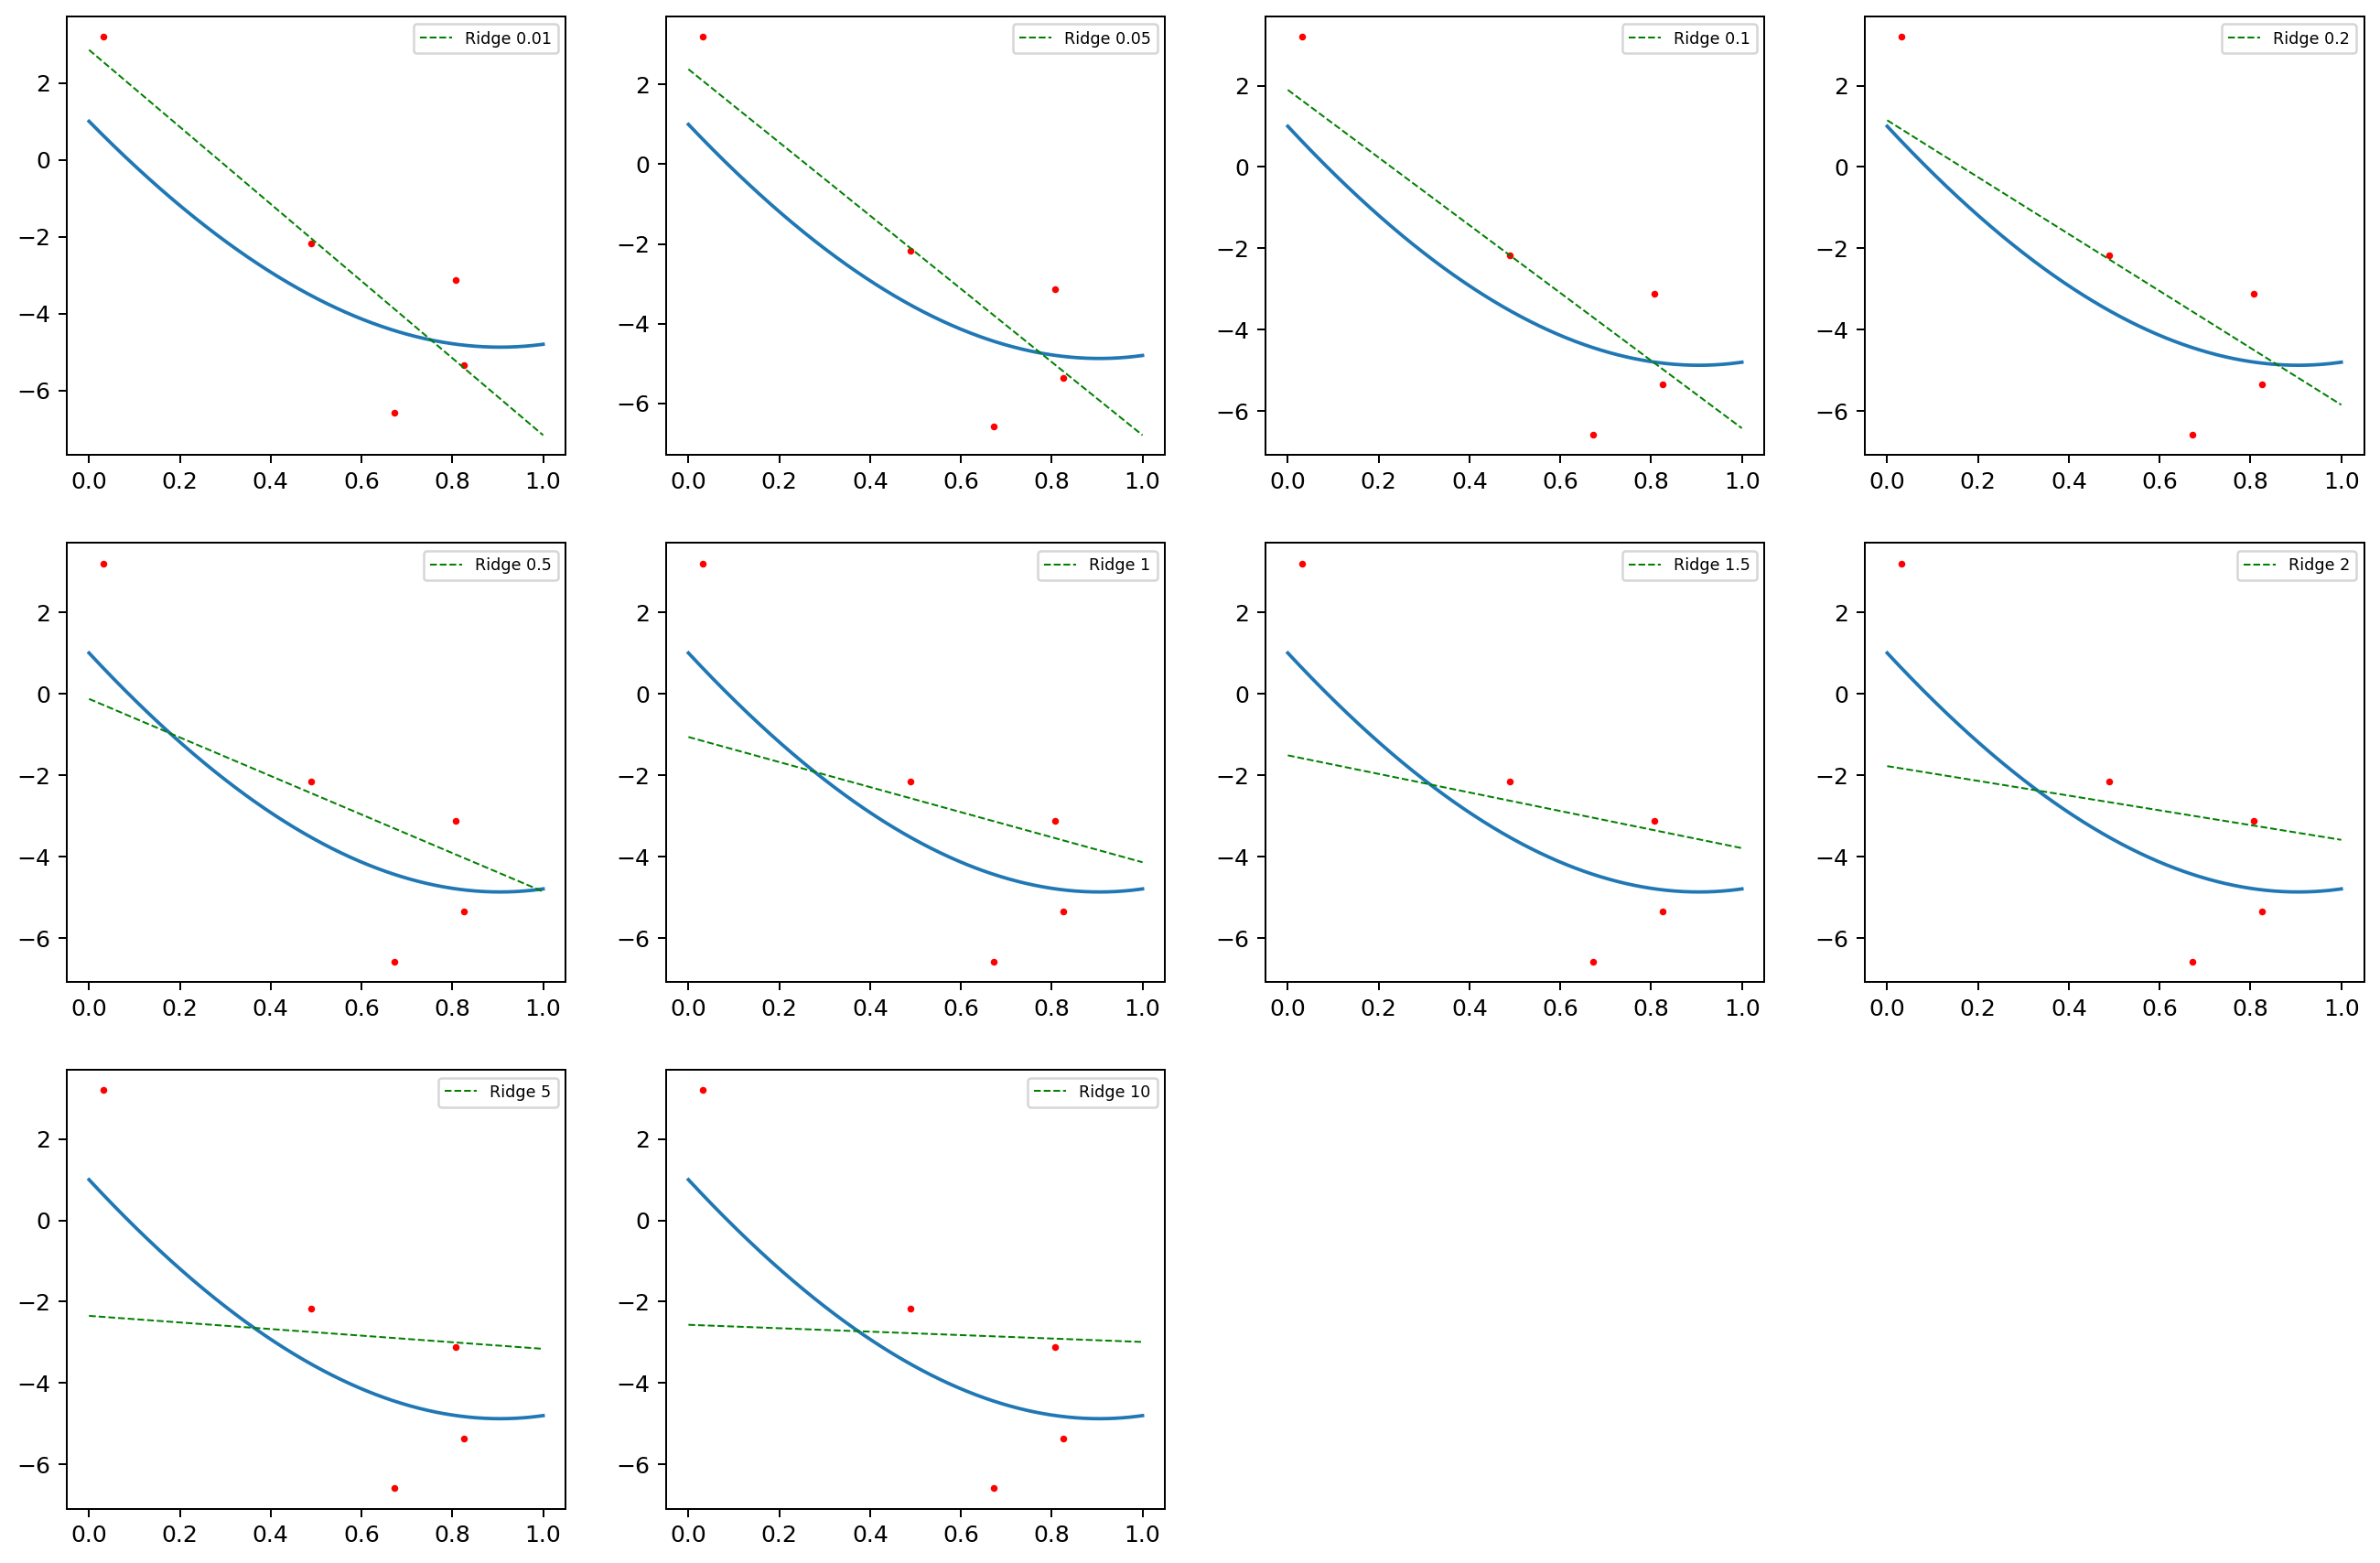

In [186]:
rows = 3
cols = 4
fig, subplots = plt.subplots(rows, cols, figsize=(18, 12))
#fig.subplots_adjust(top=0.85, wspace=0.5, hspace=0.3)

xmin = 0
xmax = 1
x_plot = np.linspace(xmin, xmax, 1000)


for i,penalty in enumerate(lambda_vals):
    r = i // cols
    c = i % cols
        
    # plot the ground truth function
    subplots[r,c].plot(x_plot, polynomial(x_plot))
    
    # plot the data
    subplots[r,c].scatter(X, Y_targets, s=4, c='r')

    # plot the Ridge linear regression fit
    subplots[r,c].plot(x_plot, coefficients[i][0] + coefficients[i][1] * x_plot, 
                       c='g', linestyle='--', linewidth=0.8, label='Ridge {}'.format(penalty))

    subplots[r,c].legend(fontsize=7)
    plt.xticks(fontsize=6)
    
# remove empty subplots (yes, it could be done in another way)
for r in range(rows):
    for c in range(cols):
        if (r * cols + c + 1) > len(lambda_vals):
            subplots[r,c].axis('off')
        
plt.show()

## Ridge vs. $\lambda$, polynomial features

In [192]:
from sklearn.preprocessing import PolynomialFeatures

lambda_vals = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 5]

coefficients = []

degree = 4
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

#X_poly = poly.fit(X, Y)
X_poly = poly_features.fit_transform(X)


for penalty in lambda_vals:

    print('\nLambda: ', penalty)
    
    # Create Ridge linear regression object
    if penalty != 0:
        Ridge = linear_model.Ridge(penalty)
    else:
        Ridge = linear_model.LinearRegression()

    # Train the model using the training set
    Ridge.fit(X_poly, Y_targets)

    # The coefficients
    #print('Model Coefficients: {:.2f} {:.2f}'.format(Ridge.coef_[0], Ridge.intercept_))
    print('Model Coefficients:', [round(c, 2) for c in Ridge.coef_], 
                                  round(Ridge.intercept_, 2))

    MSE = mean_squared_error(Y_targets, Ridge.predict(X_poly))
    print('Mean Squared Error: {:.2f}'.format(MSE))

    w0 = Ridge.intercept_
    wx = Ridge.coef_

    w = np.array( [w0, *wx] )
    #print(w)
    regularization_val = np.power( np.linalg.norm(w), 2)
    print('Regularization term: {:.2f}'.format(regularization_val))
    
    coefficients.append(w)
    


Lambda:  0
Model Coefficients: [1479.26, -6379.26, 9402.99, -4590.21] -37.3
Mean Squared Error: 0.00
Regularization term: 152370783.17

Lambda:  0.01
Model Coefficients: [-12.38, -4.27, 2.74, 7.35] 3.4
Mean Squared Error: 1.61
Regularization term: 244.59

Lambda:  0.05
Model Coefficients: [-8.69, -2.95, 0.69, 2.64] 2.49
Mean Squared Error: 2.29
Regularization term: 97.86

Lambda:  0.1
Model Coefficients: [-6.68, -2.77, -0.32, 1.0] 1.96
Mean Squared Error: 2.82
Regularization term: 57.23

Lambda:  0.2
Model Coefficients: [-4.99, -2.57, -1.0, -0.1] 1.38
Mean Squared Error: 3.41
Regularization term: 34.40

Lambda:  0.5
Model Coefficients: [-3.31, -2.11, -1.27, -0.73] 0.47
Mean Squared Error: 4.35
Regularization term: 17.77

Lambda:  1
Model Coefficients: [-2.31, -1.63, -1.1, -0.75] -0.34
Mean Squared Error: 5.45
Regularization term: 9.86

Lambda:  1.5
Model Coefficients: [-1.8, -1.32, -0.93, -0.67] -0.82
Mean Squared Error: 6.29
Regularization term: 6.97

Lambda:  2
Model Coefficients: [

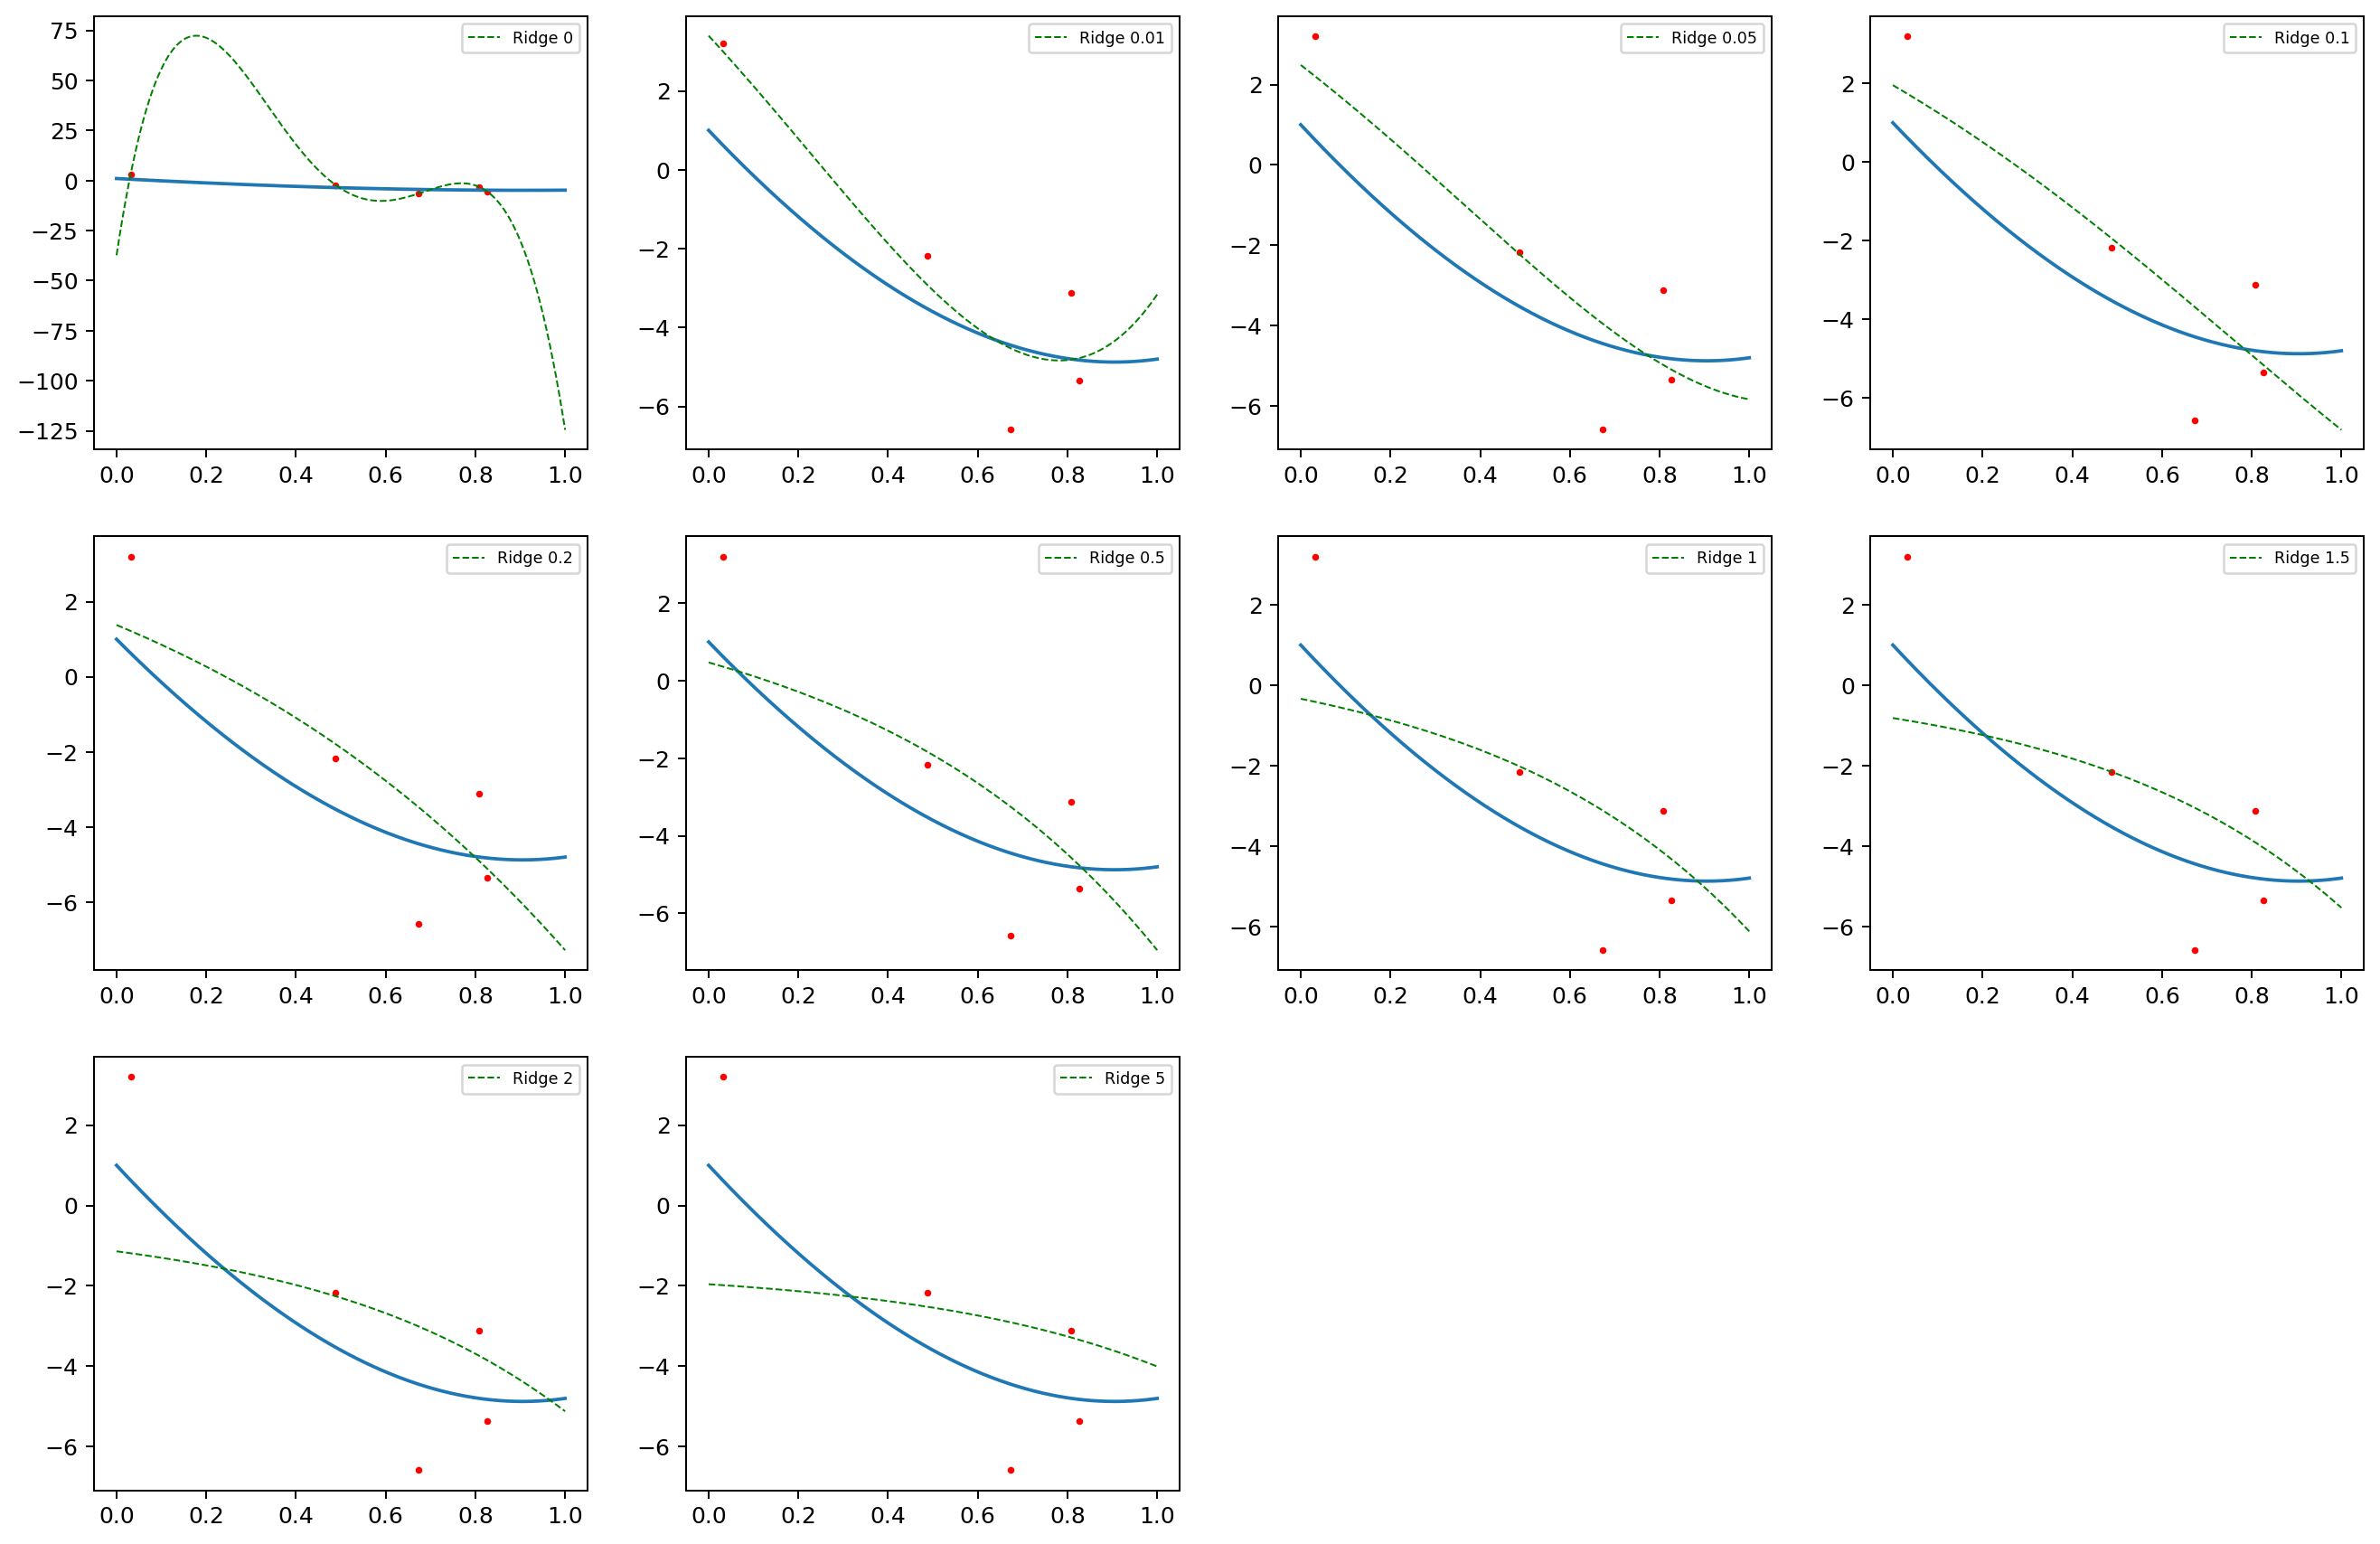

In [188]:
rows = 3
cols = 4
fig, subplots = plt.subplots(rows, cols, figsize=(18, 12))
#fig.subplots_adjust(top=0.85, wspace=0.5, hspace=0.6)

xmin = 0
xmax = 1
x_plot = np.linspace(xmin, xmax, 1000)


for i,penalty in enumerate(lambda_vals):
    r = i // cols
    c = i % cols
   
    # plot the ground truth function
    subplots[r,c].plot(x_plot, polynomial(x_plot))
    
    # plot the data
    subplots[r,c].scatter(X, Y_targets, s=4, c='r')

    # plot the Ridge polynomial regression fit
    poly_ridge = np.poly1d(coefficients[i][::-1])
    
    
    subplots[r,c].plot(x_plot, poly_ridge(x_plot),
                       c='g', linestyle='--', linewidth=0.8, label='Ridge {}'.format(penalty))

    subplots[r,c].legend(fontsize=7)
    plt.xticks(fontsize=7)
    
# remove empty subplots (yes, it could be done in another way)
for r in range(rows):
    for c in range(cols):
        if (r * cols + c + 1) > len(lambda_vals):
            subplots[r,c].axis('off')
        
plt.show()

## Lasso vs. $\lambda$, polynomial features

In [193]:
from sklearn.preprocessing import PolynomialFeatures

lambda_vals = [0, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 5]

coefficients = []

degree = 4
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly_features.fit_transform(X)


for penalty in lambda_vals:

    print('\nLambda: ', penalty)
    
    # Create Lasso linear regression object
    if penalty != 0:
        Lasso = linear_model.Lasso(penalty)
    else:
        Lasso = linear_model.LinearRegression()

    # Train the model using the training set
    Lasso.fit(X_poly, Y_targets)

    # The coefficients
    print('Model Coefficients:'.format( [round(c, 2) for c in Lasso.coef_], 
                                        round(Lasso.intercept_, 2) ))

    MSE = mean_squared_error(Y_targets, Lasso.predict(X_poly))
    print('Mean Squared Error: {:.2f}'.format(MSE))

    w0 = Lasso.intercept_
    wx = Lasso.coef_

    w = np.array( [w0, *wx] )
    #print(w)
    regularization_val = np.power( np.linalg.norm(w), 2)
    print('Regularization term: {:.2f}'.format(regularization_val))
    
    coefficients.append(w)
    


Lambda:  0
Model Coefficients:
Mean Squared Error: 0.00
Regularization term: 152370783.17

Lambda:  0.01
Model Coefficients:
Mean Squared Error: 1.57
Regularization term: 314.06

Lambda:  0.05
Model Coefficients:
Mean Squared Error: 2.32
Regularization term: 112.20

Lambda:  0.1
Model Coefficients:
Mean Squared Error: 2.56
Regularization term: 88.09

Lambda:  0.2
Model Coefficients:
Mean Squared Error: 2.91
Regularization term: 65.62

Lambda:  0.5
Model Coefficients:
Mean Squared Error: 5.35
Regularization term: 19.71

Lambda:  1
Model Coefficients:
Mean Squared Error: 11.47
Regularization term: 7.87

Lambda:  1.5
Model Coefficients:
Mean Squared Error: 11.47
Regularization term: 7.87

Lambda:  2
Model Coefficients:
Mean Squared Error: 11.47
Regularization term: 7.87

Lambda:  5
Model Coefficients:
Mean Squared Error: 11.47
Regularization term: 7.87


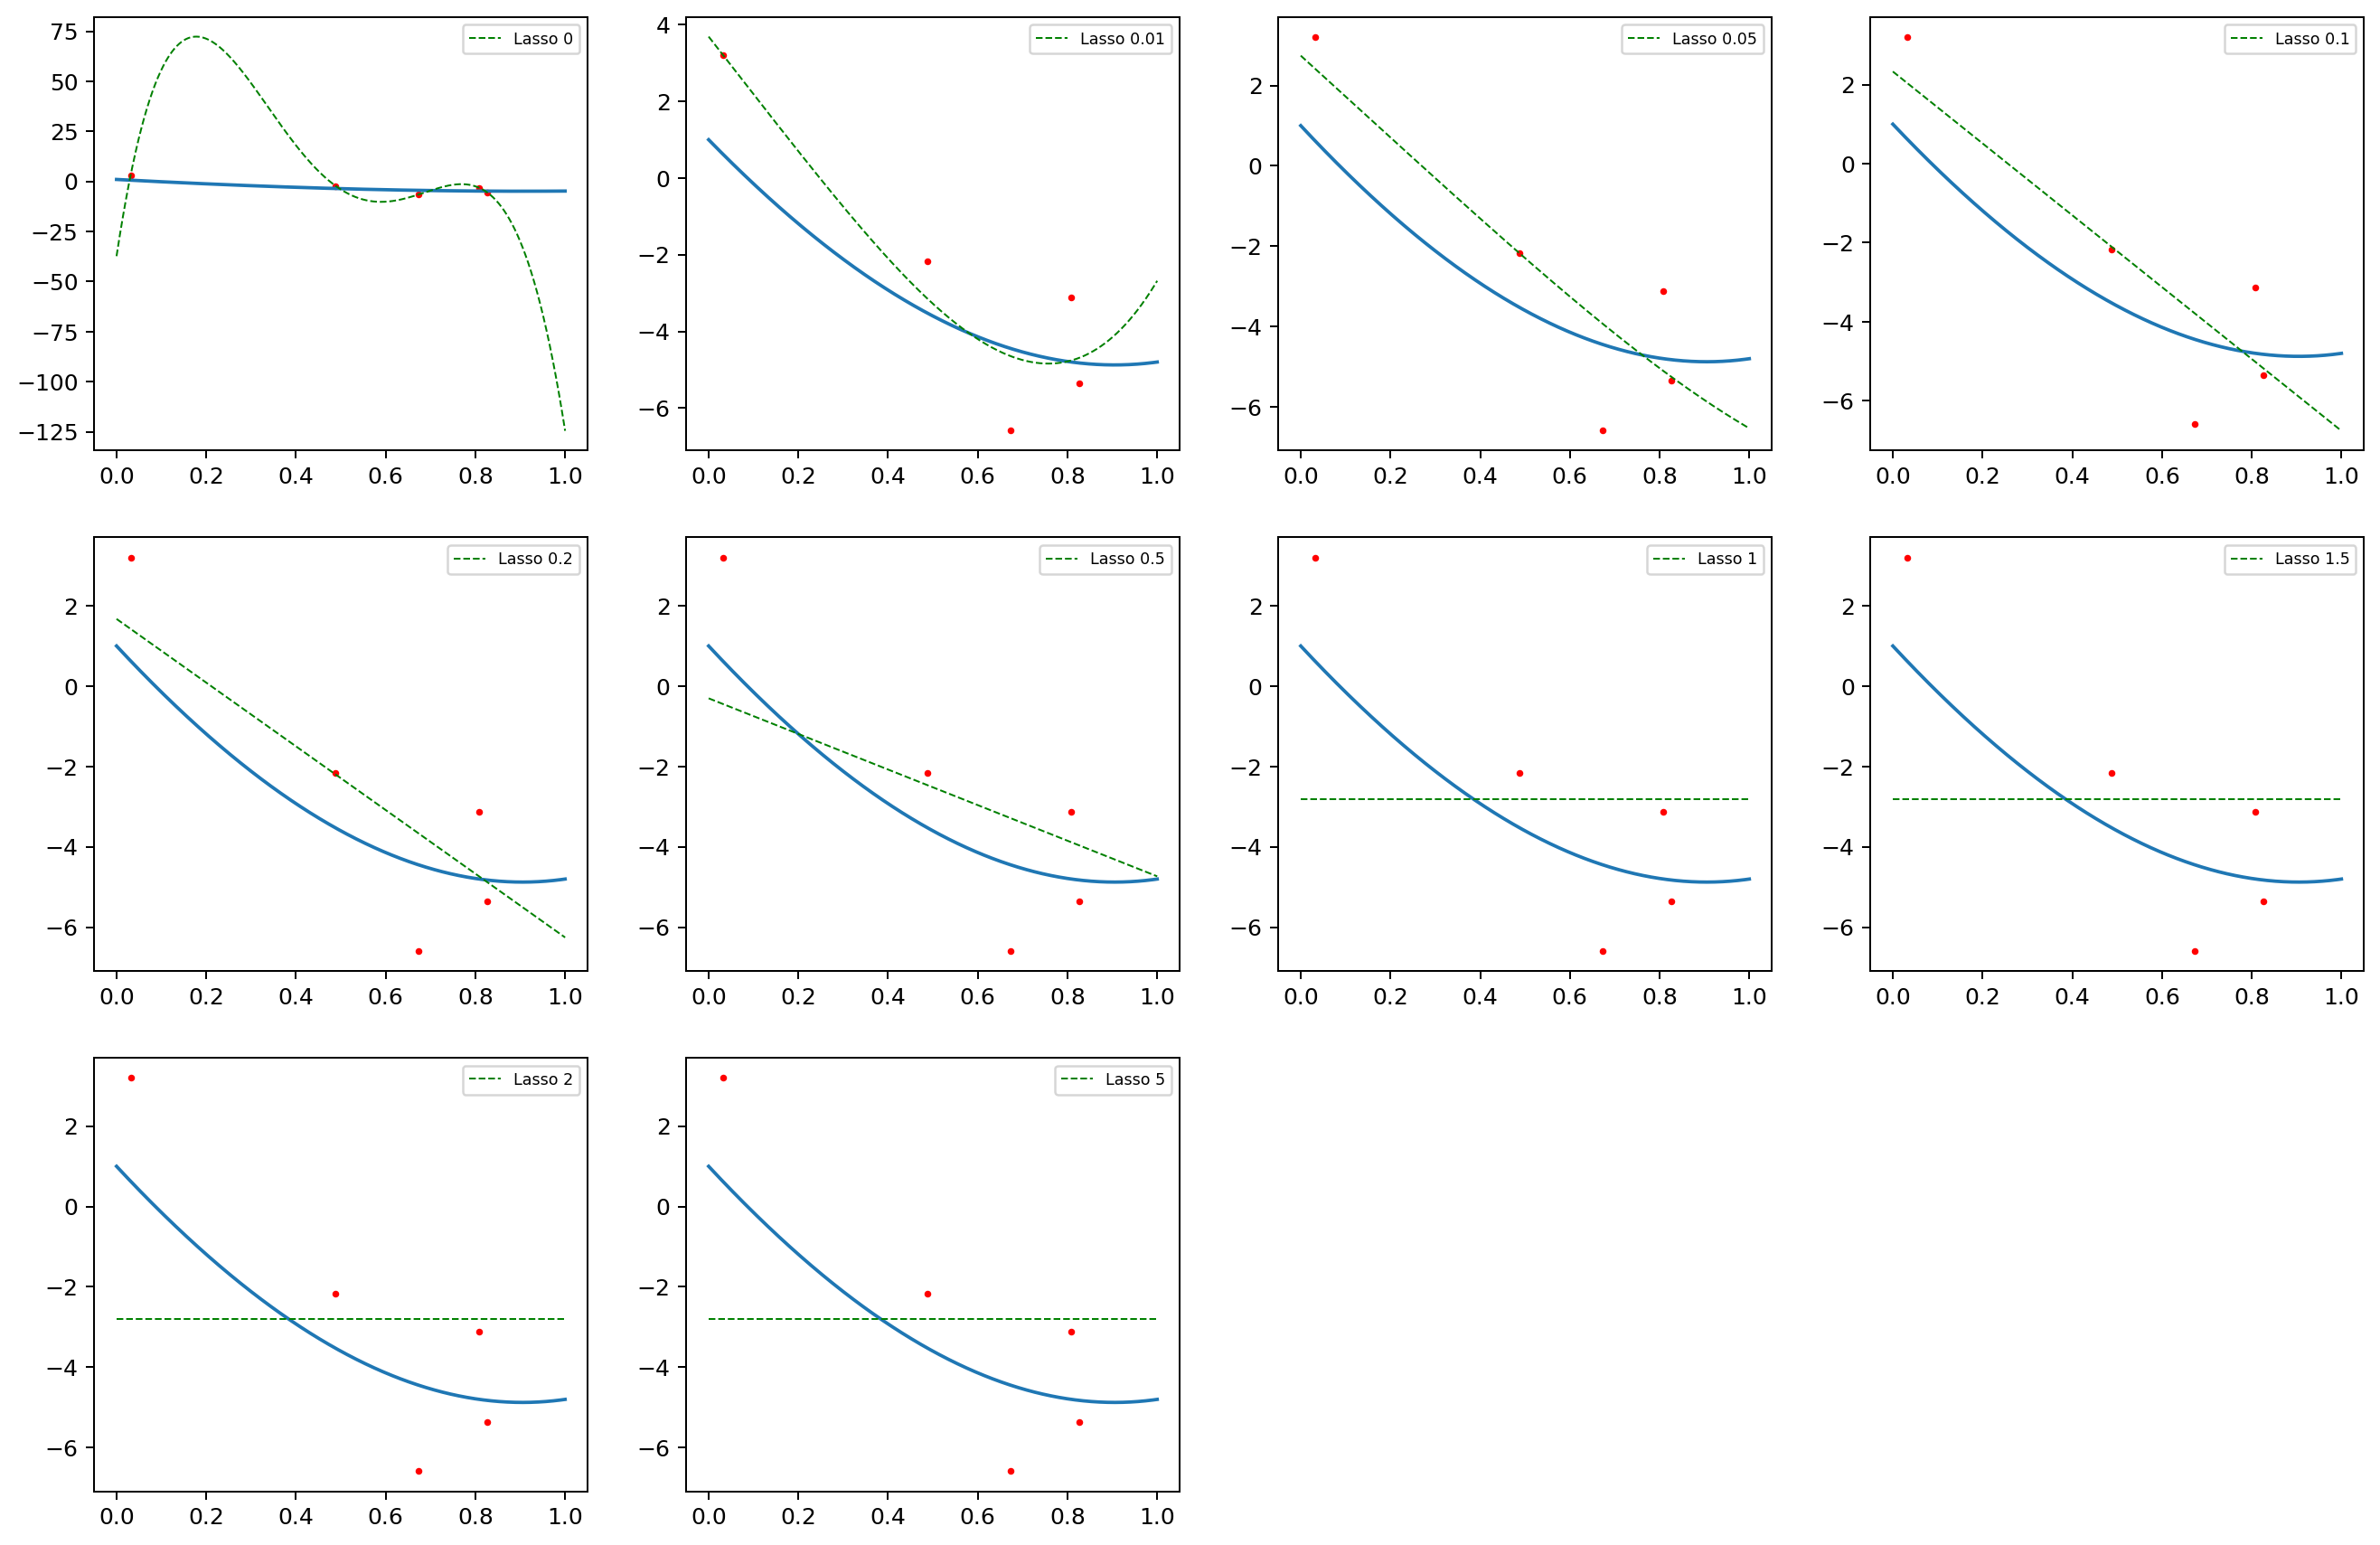

In [190]:
rows = 3
cols = 4
fig, subplots = plt.subplots(rows, cols, figsize=(18, 12))
#fig.subplots_adjust(top=0.85, wspace=0.5, hspace=0.6)

xmin = 0
xmax = 1
x_plot = np.linspace(xmin, xmax, 1000)


for i,penalty in enumerate(lambda_vals):
    r = i // cols
    c = i % cols
   
    # plot the ground truth function
    subplots[r,c].plot(x_plot, polynomial(x_plot))
    
    # plot the data
    subplots[r,c].scatter(X, Y_targets, s=4, c='r')

    # plot the Lasso polynomial regression fit
    poly_lasso = np.poly1d(coefficients[i][::-1])
    
    
    subplots[r,c].plot(x_plot, poly_lasso(x_plot),
                       c='g', linestyle='--', linewidth=0.8, 
                       label='Lasso {}'.format(penalty))

    subplots[r,c].legend(fontsize=7)
    plt.xticks(fontsize=7)
    
# remove empty subplots (yes, it could be done in another way)
for r in range(rows):
    for c in range(cols):
        if (r * cols + c + 1) > len(lambda_vals):
            subplots[r,c].axis('off')
        
plt.show()

# Case study with a mart sales dataset

Example elaborated from https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [106]:
import pandas as pd

filepath = '../datasets/mart_sales.csv'

sales_df = pd.read_csv(filepath)

sales_df
    

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

## Impute numerical features

In [107]:
#features = ['Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year', 'Item_MRP']
numeric_features = sales_df.select_dtypes(include=[np.number]).columns
for f in numeric_features:
    print(f)
    missing = np.sum(sales_df[f].isnull())
  
    if missing > 0:
        print('--> Feature column {} has {} missing entries'.format(f, missing))
        # Impute missing values with the mean value of the feature column
        sales_df[f].fillna((sales_df[f].mean()), inplace=True)

Item_Weight
--> Feature column Item_Weight has 1463 missing entries
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


In [109]:
# Item_Visibility could be 0, indicating for instance just a new item for which there are no data
# It is appropriate to replace the 0 with the mean value

visibility_mean = sales_df['Item_Visibility'].replace(0, np.nan).mean(skipna=True)  # skip 0 values
sales_df[ sales_df['Item_Visibility'] == 0 ] = visibility_mean

## Impute categorical features

In [110]:
categorical_features = list(sales_df.select_dtypes(include=['object']).columns)

for f in categorical_features:
    print(f)
    missing = np.sum(sales_df[f].isnull())
    if missing > 0:
        print('--> Feature column {} has {} missing entries'.format(f, missing))
        # Impute missing values with the mode value of the feature column
        mode_v = sales_df[f].mode()
        print('Mode:', mode_v[0])
        sales_df[f].fillna(mode_v[0], inplace=True)
        
# years are 'big' numbers, but it matters is the number of years from a reference
# year, such that it makes sense to replace years with the displacement number of years
# with respect to the reference year, 2013 in this case
sales_df['Outlet_Establishment_Year'] = 2013 - sales_df['Outlet_Establishment_Year']

#sales_df['Outlet_Size'].fillna('Small',inplace=True)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
--> Feature column Outlet_Size has 2266 missing entries
Mode: Medium
Outlet_Location_Type
Outlet_Type


## Convert categorical to numeric features

### Drop categories that would generate too many binary features

In [111]:
# let's check first how many unique categories per column feature
categorical_features = list(sales_df.select_dtypes(include=['object']).columns)
for f in categorical_features:
    unique_values = sales_df[f].value_counts().shape[0] #unique().shape[0]
    print('Feature {} has {} unique values'.format(f, unique_values))

Feature Item_Identifier has 1560 unique values
Feature Item_Fat_Content has 6 unique values
Feature Item_Type has 17 unique values
Feature Outlet_Identifier has 11 unique values
Feature Outlet_Size has 4 unique values
Feature Outlet_Location_Type has 4 unique values
Feature Outlet_Type has 5 unique values


Maybe it makes sense to not take into account the feature `Item_Identifier` because using a one-hot encoding this will be generate 1560 binary features! And maybe we don't need the information about the the item type.

In [112]:
sales_df.drop(columns=['Item_Identifier'], inplace=True)

### Transform by one-hot encoding

Now let's transform all the other categorical features using a simple one-hot encoding

In [113]:
# identify categorical features
categorical_features = list(sales_df.select_dtypes(include=['object']).columns)

print(categorical_features)

# create dummy variables to convert categorical into numeric values
dummies = pd.get_dummies(sales_df[categorical_features], prefix= categorical_features)

sales_df.drop(categorical_features, axis=1, inplace = True)

# concatenate original df (up to before the last) without categorical + converted categorical + last (target)
sales_df = pd.concat([sales_df.iloc[:, :-1], dummies, sales_df.iloc[:, -1]], axis =1 )

print(sales_df.head())

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
   Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
0     9.300000         0.016047  249.809200                  14.000000   
1     5.920000         0.019278   48.269200                   4.000000   
2    17.500000         0.016760  141.618000                  14.000000   
3     0.070482         0.070482    0.070482                2012.929518   
4     0.070482         0.070482    0.070482                2012.929518   

   Item_Fat_Content_0.07048184085069421  Item_Fat_Content_LF  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     1                    0   
4                                     1                    0   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0   

## Train a  linear regression model

In [114]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

OLS = LinearRegression()

X = sales_df.iloc[:, 0:-1]
Y = sales_df.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)

OLS.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test the linear regression model

In [115]:
targets_pred = OLS.predict(X_test)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(Y_test, targets_pred)))
                                                        
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y_test, targets_pred)))

Mean squared error: 1229111.31
Coefficient of determination (R2): 0.60


## Residuals and Heteroskedasticity

Performance is acceptable but not very good. Probably the use of linear features isn't appropriate. 

We can give a look of how the errors/residuals in predictions, $r = (y-\hat{y})$ are distributed.

It can be observed that the residuals are not uniform across the range of prediction values.
If we look at the residual as a random variable, the plot tells us that its variance changes based on the value. 
Indeed, the variance grows, showing a funnel shape in the plot.

This property indicates **heteroskedasticity** in the data, meaning that **variance is not constant.**  This can be due to some inherent characteristics of the data, or to the presence of outliers or extreme tail values, or be the result of a quite wrong fitted model.

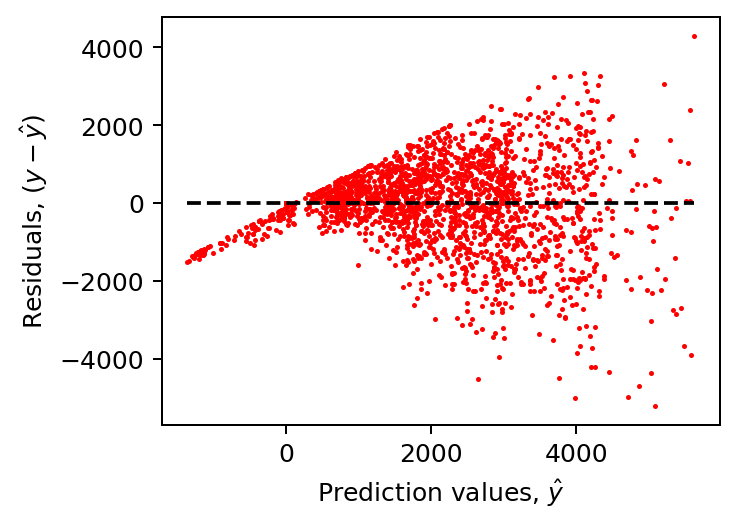

In [116]:
plt.figure(figsize=(4,3))
plt.scatter(targets_pred, (targets_pred - Y_test), c='r', s=1)

plt.hlines(y=0, xmin=targets_pred.min(), xmax=targets_pred.max(), linestyle='--')

plt.xlabel('Prediction values, $\hat{y}$')
plt.ylabel('Residuals, $(y - \hat{y})$')
plt.show()

## Feature weights

We have a high dimensional data set.

Some of the variables might give redundant information, other might even be irrelevant, some might be even highly correlated or linearly dependent.

Let's visually check how the weights are distributed.

In [117]:
## show the features weight learned by linear regression

weights = pd.DataFrame(X_train.columns, columns=['Feature Name'])

weights['Weight Estimate'] = pd.Series(OLS.coef_)

weights

Feature Name  Weight Estimate
0                                Item_Weight        -0.010885
1                            Item_Visibility      -158.914139
2                                   Item_MRP        15.495716
3                  Outlet_Establishment_Year         0.133280
4       Item_Fat_Content_0.07048184085069421        -2.646788
5                        Item_Fat_Content_LF         5.997721
6                   Item_Fat_Content_Low Fat         9.467481
7                   Item_Fat_Content_Regular        52.960959
8                   Item_Fat_Content_low fat       -45.818010
9                       Item_Fat_Content_reg       -19.961363
10             Item_Type_0.07048184085069421        -2.646788
11                    Item_Type_Baking Goods       -21.921455
12                          Item_Type_Breads       -18.858645
13                       Item_Type_Breakfast       112.875289
14                          Item_Type_Canned         9.881852
15                           Item_Type_Dairy       -50.885745
16                    Item_Type_Frozen Foods       -35.460427
17           Item_Type_Fruits and Vegetables        -8.725893
18                     Item_Type_Hard Drinks       -35.114762
19              Item_Type_Health and Hygiene       -53.127272
20                       Item_Type_Household       -36.668980
21                            Item_Type_Meat       -46.373981
22                          Item_Type_Others       -60.819838
23                         Item_Type_Seafood       251.774855
24                     Item_Type_Snack Foods        -7.632647
25                     Item_Type_Soft Drinks       -43.428985
26                   Item_Type_Starchy Foods        47.133423
27     Outlet_Identifier_0.07048184085069421        -2.646788
28                  Outlet_Identifier_OUT010      -675.723845
29                  Outlet_Identifier_OUT013       -13.451347
30                  Outlet_Identifier_OUT017        21.216090
31                  Outlet_Identifier_OUT018       -45.810090
32                  Outlet_Identifier_OUT019      -371.187118
33                  Outlet_Identifier_OUT027       798.477400
34                  Outlet_Identifier_OUT035       183.409359
35                  Outlet_Identifier_OUT045      -171.334090
36                  Outlet_Identifier_OUT046       130.312105
37                  Outlet_Identifier_OUT049       146.738323
38           Outlet_Size_0.07048184085069421        -2.646788
39                          Outlet_Size_High       -13.451347
40                        Outlet_Size_Medium        73.563789
41                         Outlet_Size_Small       -57.465654
42  Outlet_Location_Type_0.07048184085069421        -2.646788
43               Outlet_Location_Type_Tier 1       -94.136689
44               Outlet_Location_Type_Tier 2        33.291359
45               Outlet_Location_Type_Tier 3        63.492118
46           Outlet_Type_0.07048184085069421        -2.646788
47                 Outlet_Type_Grocery Store     -1046.910963
48             Outlet_Type_Supermarket Type1       296.890442
49             Outlet_Type_Supermarket Type2       -45.810090
50             Outlet_Type_Supermarket Type3       798.477400

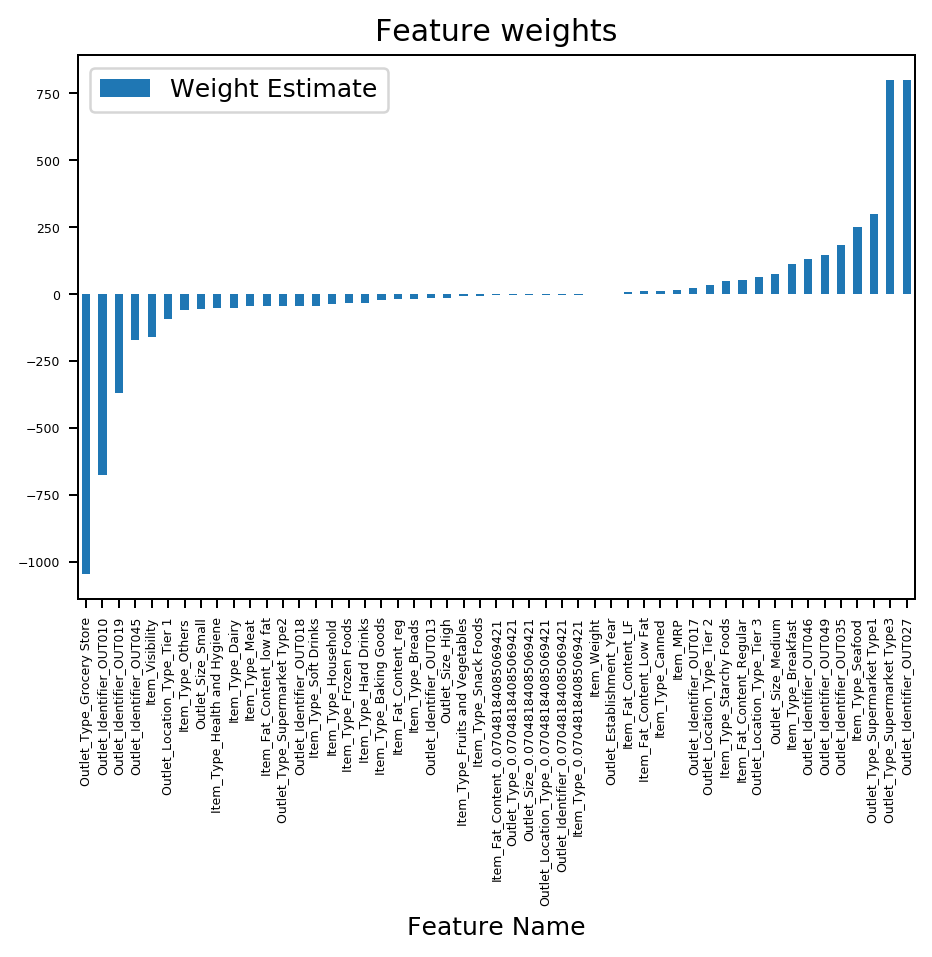

In [118]:
weights_sorted = weights.sort_values(by=['Weight Estimate'])

#print(weights_sorted.describe())

weights_sorted.plot(0, 1, kind='bar', title='Feature weights', fontsize=5 )
#plt.xticks([], [])
plt.show()

Some features have weights that are much higher than others, such that the target values, the sale price is much driven by these features.

Let's check the effect of different regularization techniques on the weights.
 

## Ridge regression at work

Min - max: -1046 798
Mean squared error: 1235786.97
Coefficient of determination (R2): 0.60
Min - Max values: [-910.41, 733.33]


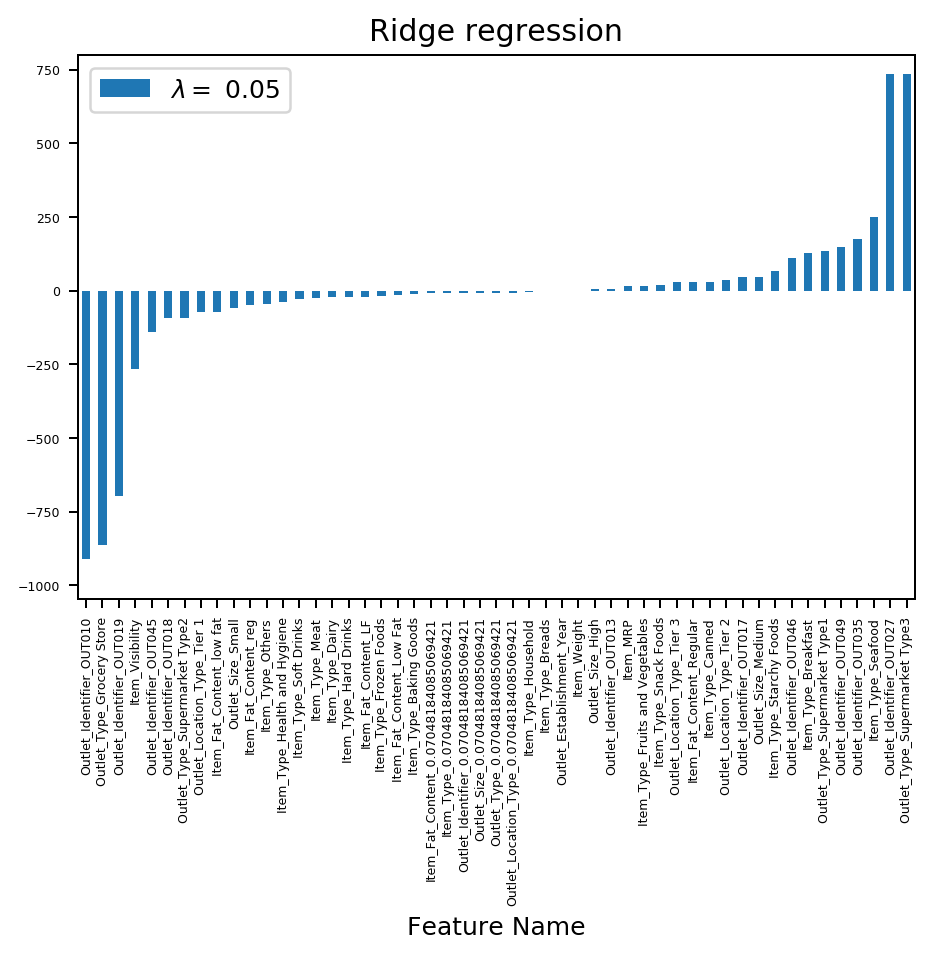

Mean squared error: 1411111.31
Coefficient of determination (R2): 0.55
Min - Max values: [-735.50, 609.99]


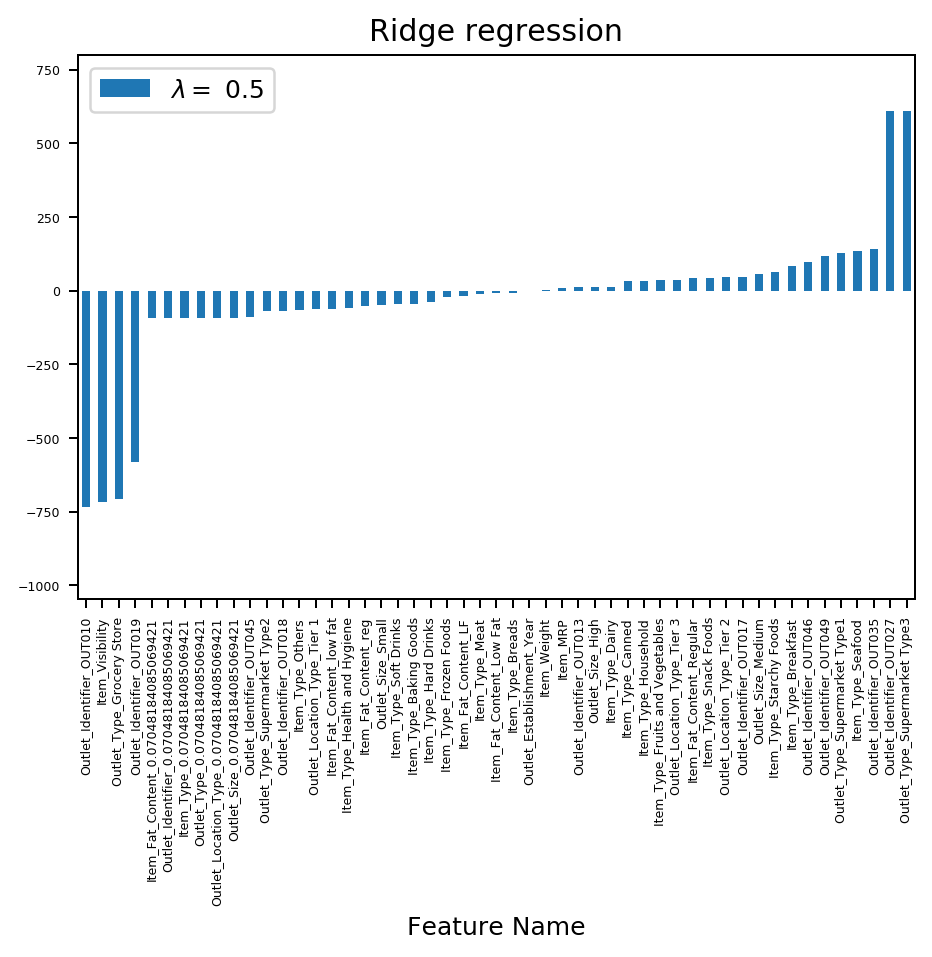

Mean squared error: 1604535.98
Coefficient of determination (R2): 0.48
Min - Max values: [-823.32, 515.72]


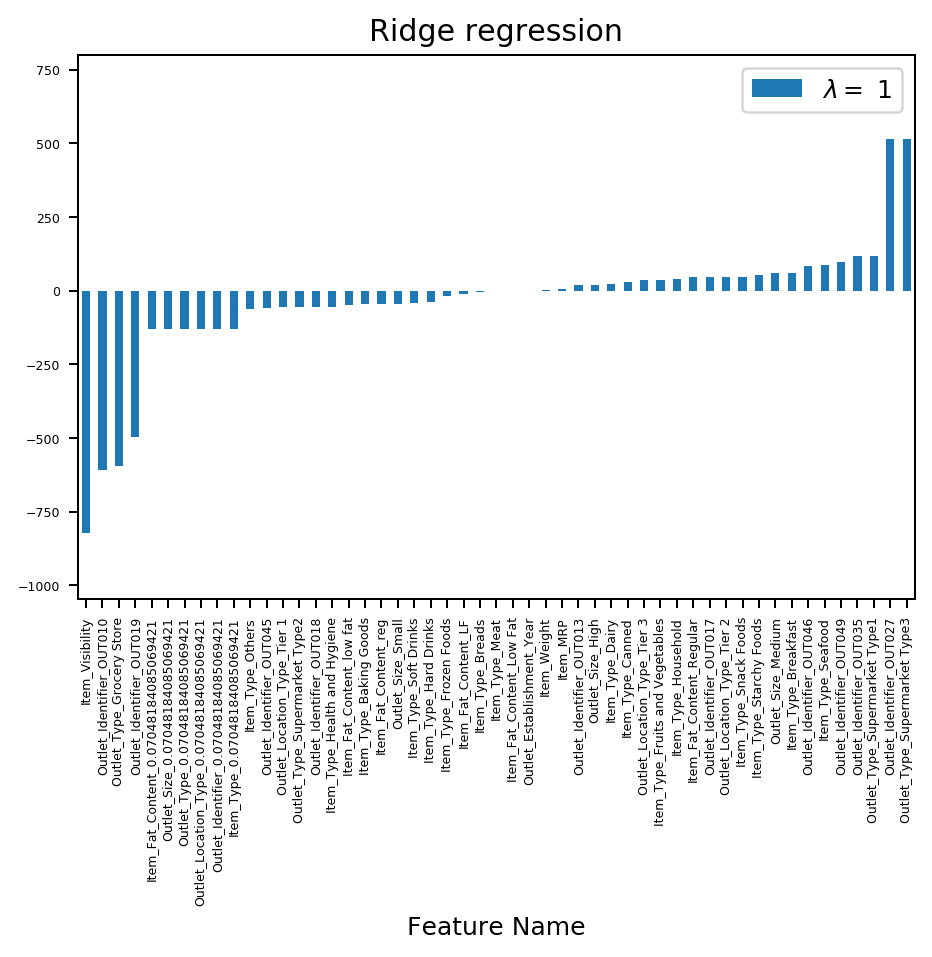

Mean squared error: 1872891.72
Coefficient of determination (R2): 0.40
Min - Max values: [-787.39, 395.52]


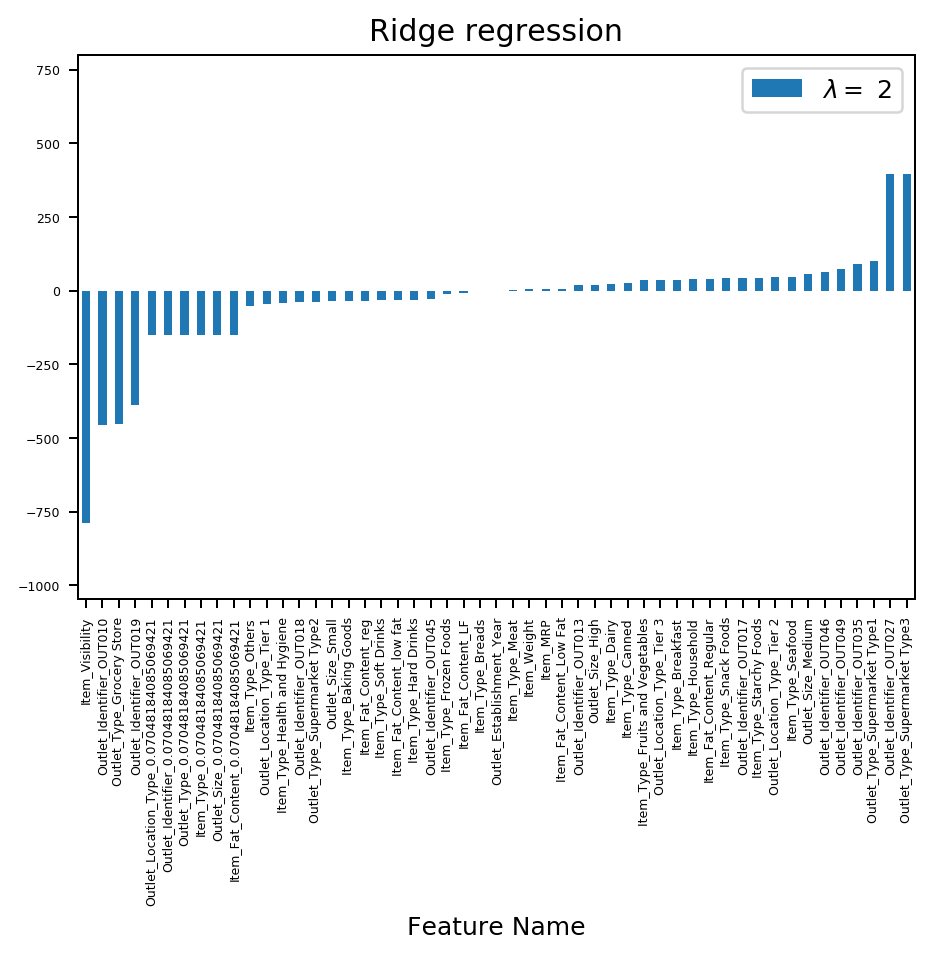

Mean squared error: 2540745.16
Coefficient of determination (R2): 0.18
Min - Max values: [-354.73, 140.77]


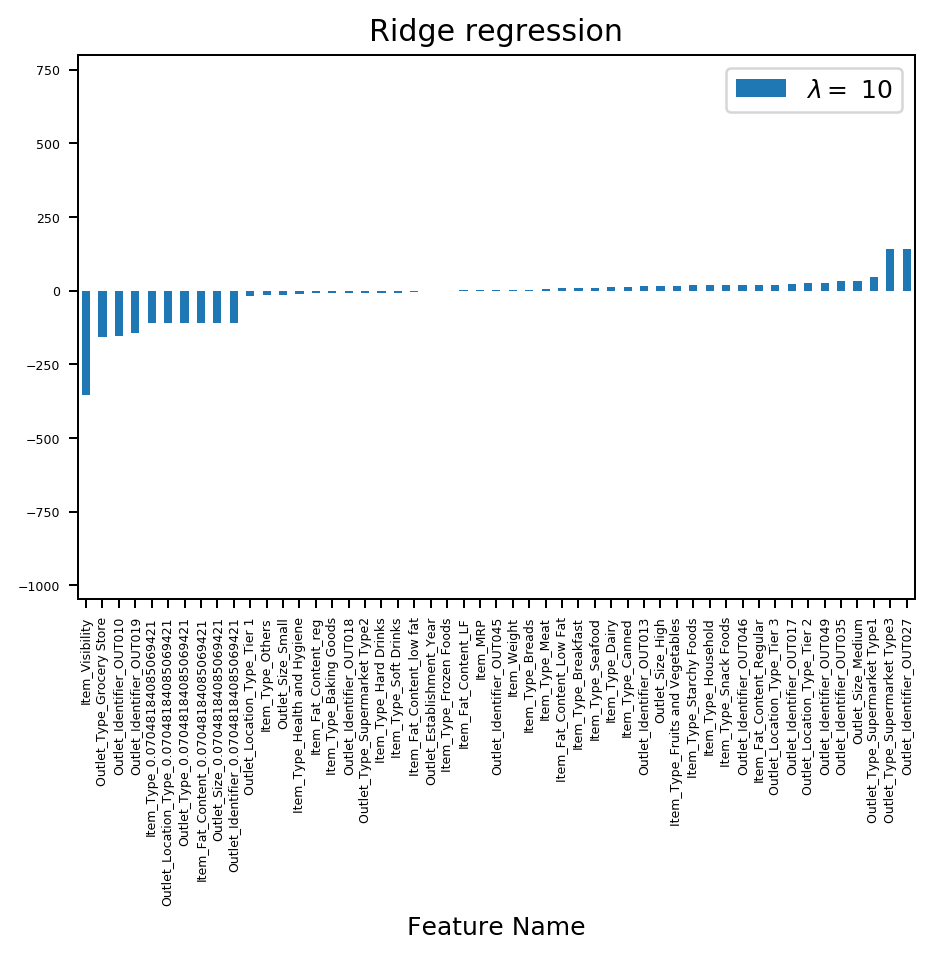

Mean squared error: 2945094.10
Coefficient of determination (R2): 0.05
Min - Max values: [-89.64, 33.82]


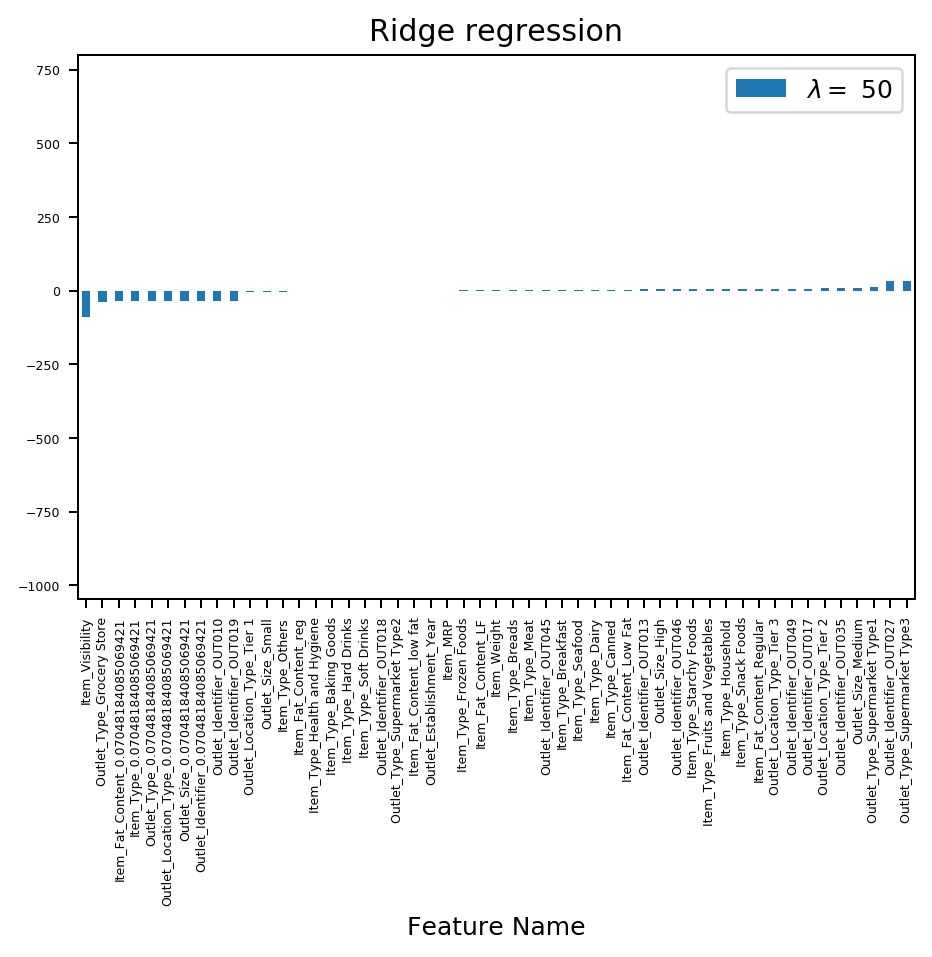

Mean squared error: 3024325.57
Coefficient of determination (R2): 0.03
Min - Max values: [-46.30, 17.37]


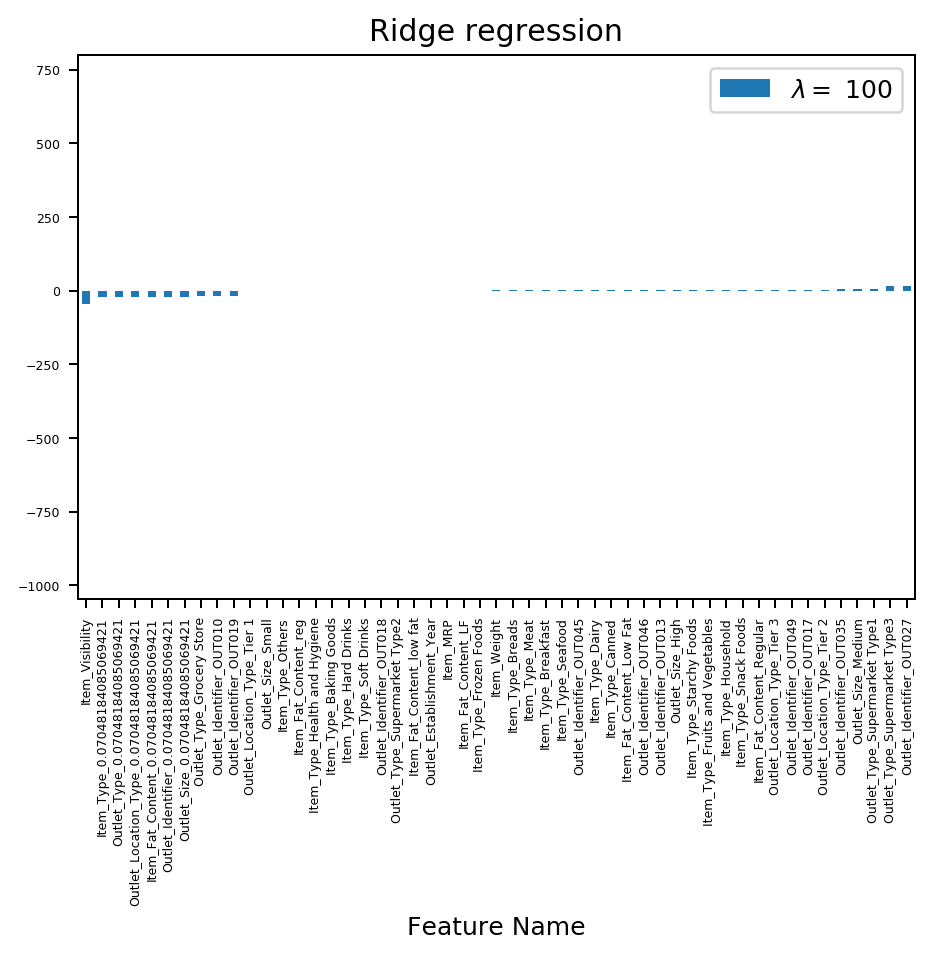

In [119]:
lambda_vals = [0.05, 0.5, 1, 2, 10, 50, 100]

# to fix the scale of the plot, to appreciate the reduction in weight magnitude
weights_max = int(OLS.coef_.max())
weights_min = int(OLS.coef_.min() )

print('Min - max:', weights_min, weights_max)

for l in lambda_vals:
    
    # Create Ridge linear regression object
    Ridge = linear_model.Ridge(l, normalize=True)

    # Train the model using the training sets
    Ridge.fit(X_train, Y_train)
    
    targets_pred = Ridge.predict(X_test)

    # The mean squared error
    print('Mean squared error: {:.2f}'.format(mean_squared_error(Y_test, targets_pred)))
                                                        
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y_test, targets_pred)))

    print('Min - Max values: [{:.2f}, {:.2f}]'.format(Ridge.coef_.min(), 
                                                      Ridge.coef_.max()))
    
    # The coefficients
    #print('Model Coefficients: \n', Ridge.coef_)
      

    weights['Weight Estimate'] = pd.Series(Ridge.coef_)
    
    weights_sorted = weights.sort_values(by=['Weight Estimate'])


    weights_sorted.plot(0, 1, kind='bar', title='Feature weights', 
                        fontsize=5, label='$\lambda = $ {}'.format(l))
    
    plt.ylim(weights_min, weights_max)
    plt.title('Ridge regression')
    plt.legend()
    plt.show()



## Lasso regression at work

Min - max: -1046 798


/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Mean squared error: 1228888.16
Coefficient of determination (R2): 0.60
Min - Max values: [-1051.29, 1457.78]


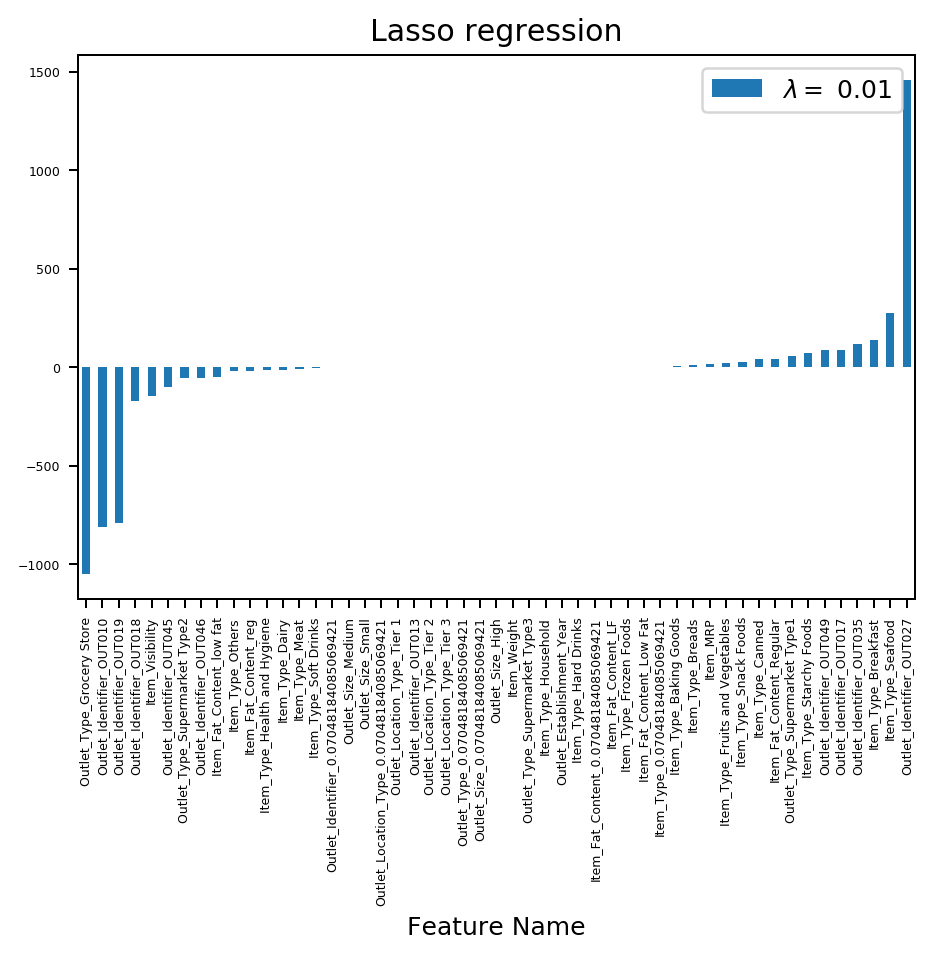

Mean squared error: 1228086.78
Coefficient of determination (R2): 0.61
Min - Max values: [-1841.04, 1449.85]


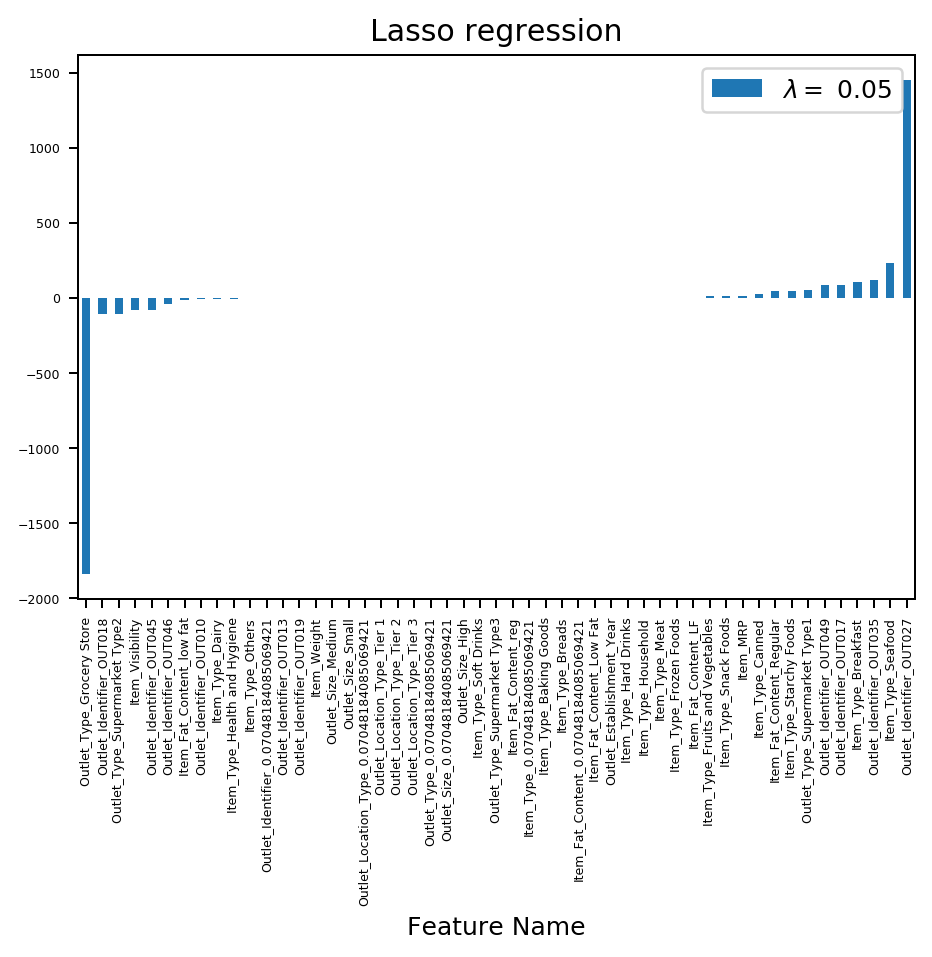

Mean squared error: 1240412.34
Coefficient of determination (R2): 0.60
Min - Max values: [-1758.11, 1335.28]


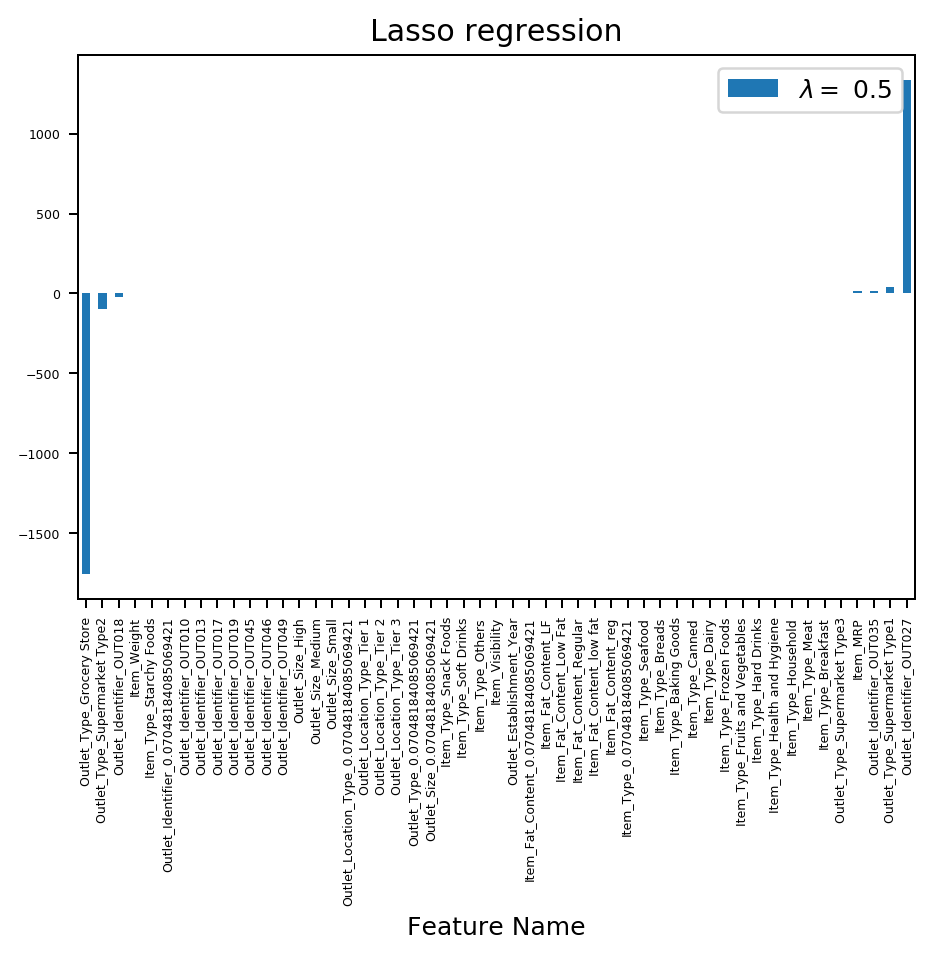

Mean squared error: 1267704.29
Coefficient of determination (R2): 0.59
Min - Max values: [-1665.19, 1200.83]


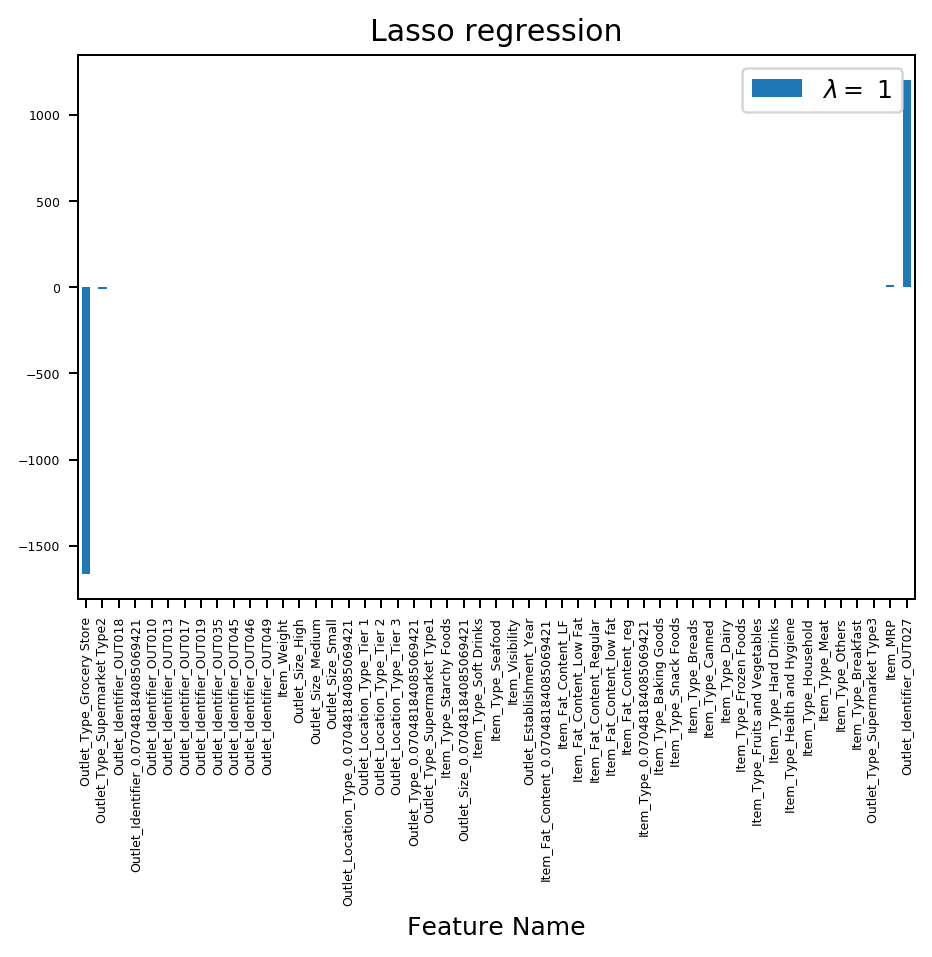

Mean squared error: 1296551.86
Coefficient of determination (R2): 0.58
Min - Max values: [-1548.60, 1089.99]


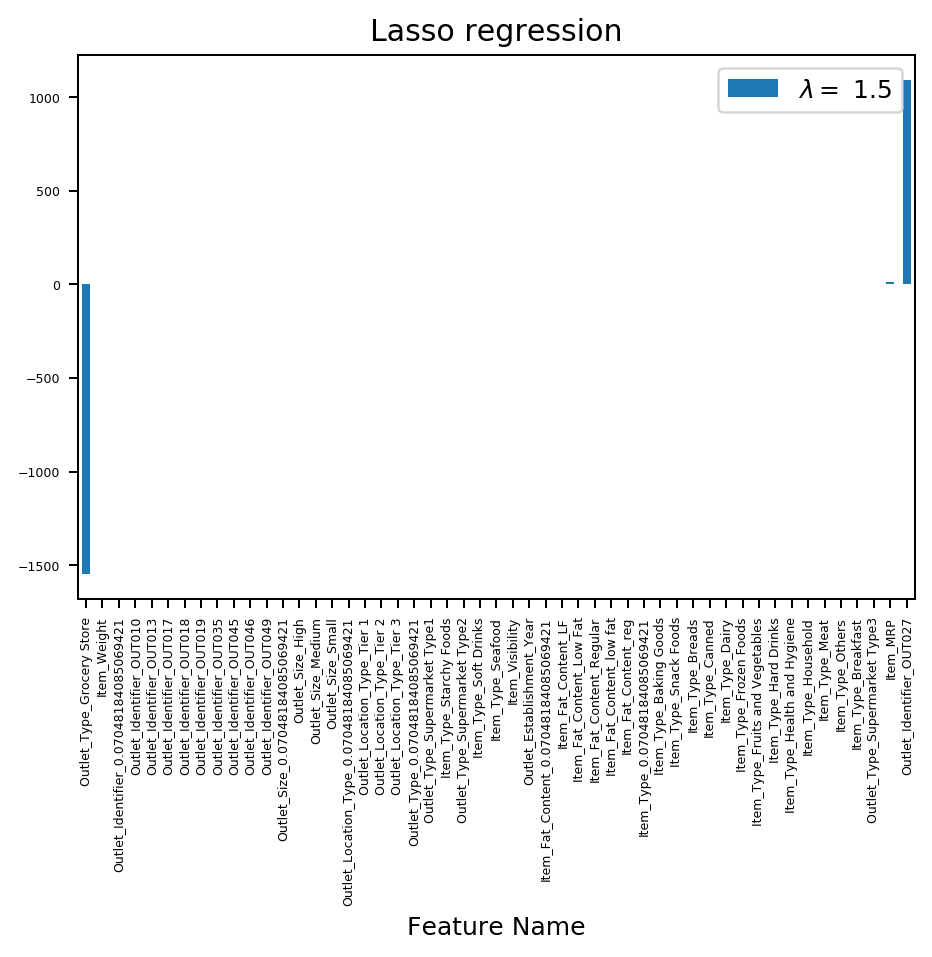

Mean squared error: 2606397.56
Coefficient of determination (R2): 0.16
Min - Max values: [0.00, 3.88]


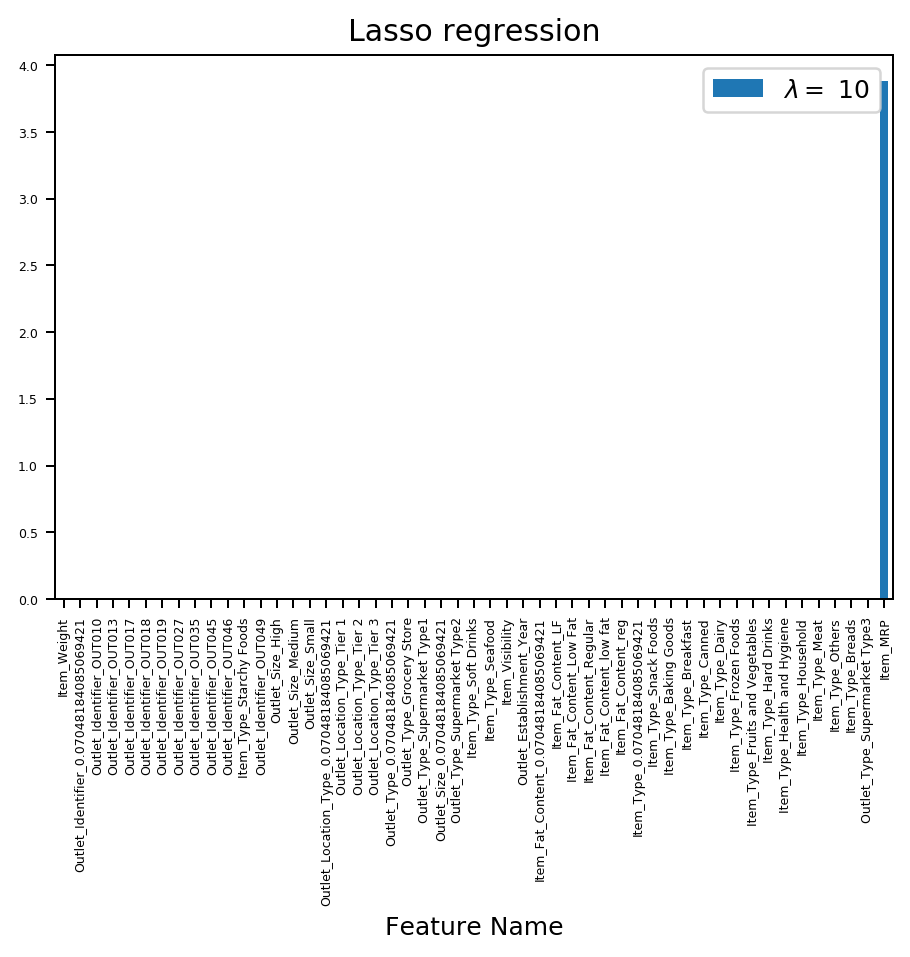

In [120]:
lambda_vals = [0.01, 0.05, 0.5, 1, 1.5, 10]

# to fix the scale of the plot, to appreciate the reduction in weight magnitude
weights_max = int(OLS.coef_.max())
weights_min = int(OLS.coef_.min())

print('Min - max:', weights_min, weights_max)

for l in lambda_vals:
    
    # Create Lasso linear regression object
    Lasso = linear_model.Lasso(l, normalize=True)

    # Train the model using the training sets
    Lasso.fit(X_train, Y_train)
    
    targets_pred = Lasso.predict(X_test)

    # The mean squared error
    print('Mean squared error: {:.2f}'.format(mean_squared_error(Y_test, targets_pred)))
                                                        
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y_test, targets_pred)))

    print('Min - Max values: [{:.2f}, {:.2f}]'.format(Lasso.coef_.min(), 
                                                      Lasso.coef_.max()))
    
    # The coefficients
    #print('Model Coefficients: \n', Ridge.coef_)
      

    weights['Weight Estimate'] = pd.Series(Lasso.coef_)
    
    weights_sorted = weights.sort_values(by=['Weight Estimate'])


    weights_sorted.plot(0, 1, kind='bar', title='Feature weights', 
                        fontsize=5, label='$\lambda = $ {}'.format(l))
    
    #plt.ylim(weights_min, weights_max)
    
    plt.title('Lasso regression')
    plt.legend()
    plt.show()
    
    



## Elastic Net regression at work

Min - max: -10 -10
Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


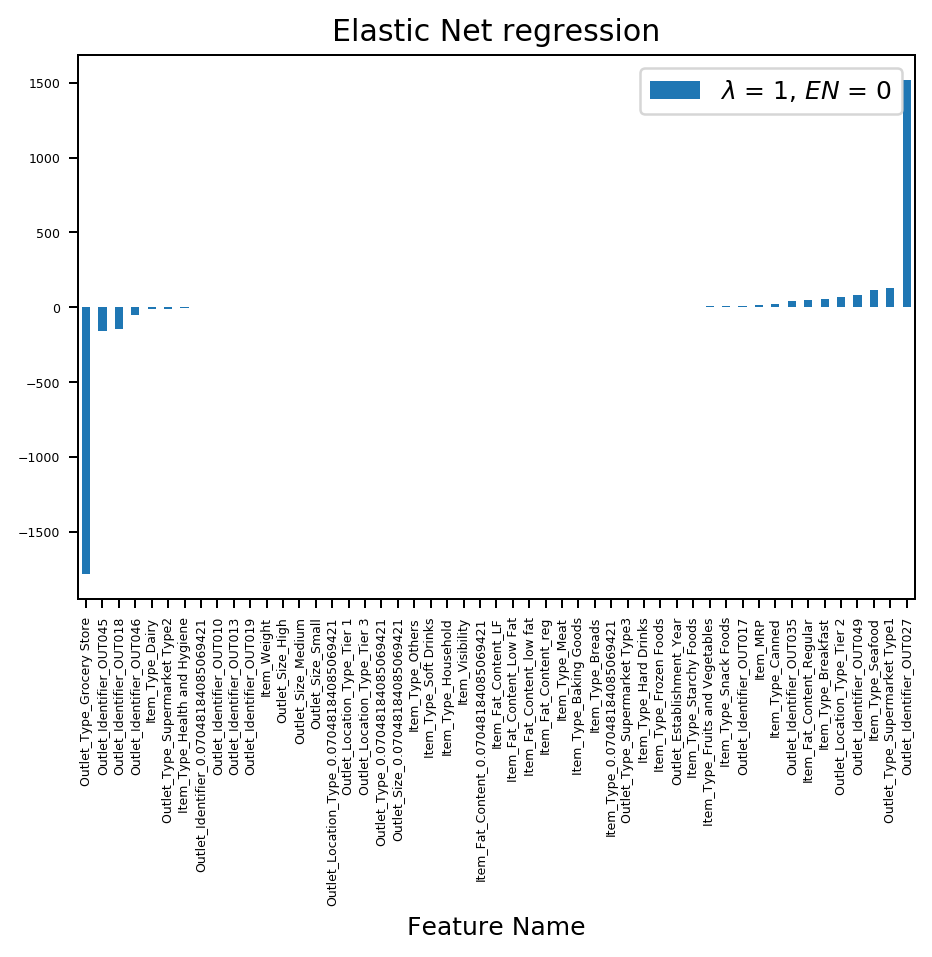

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


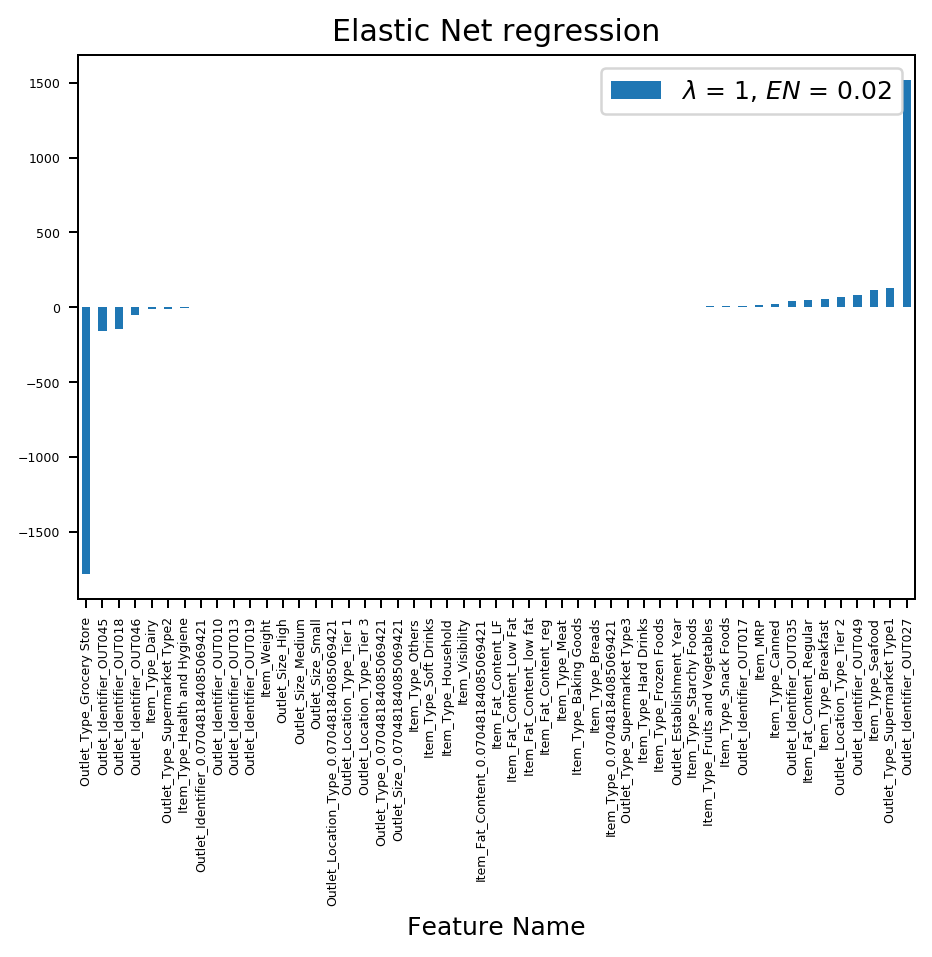

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


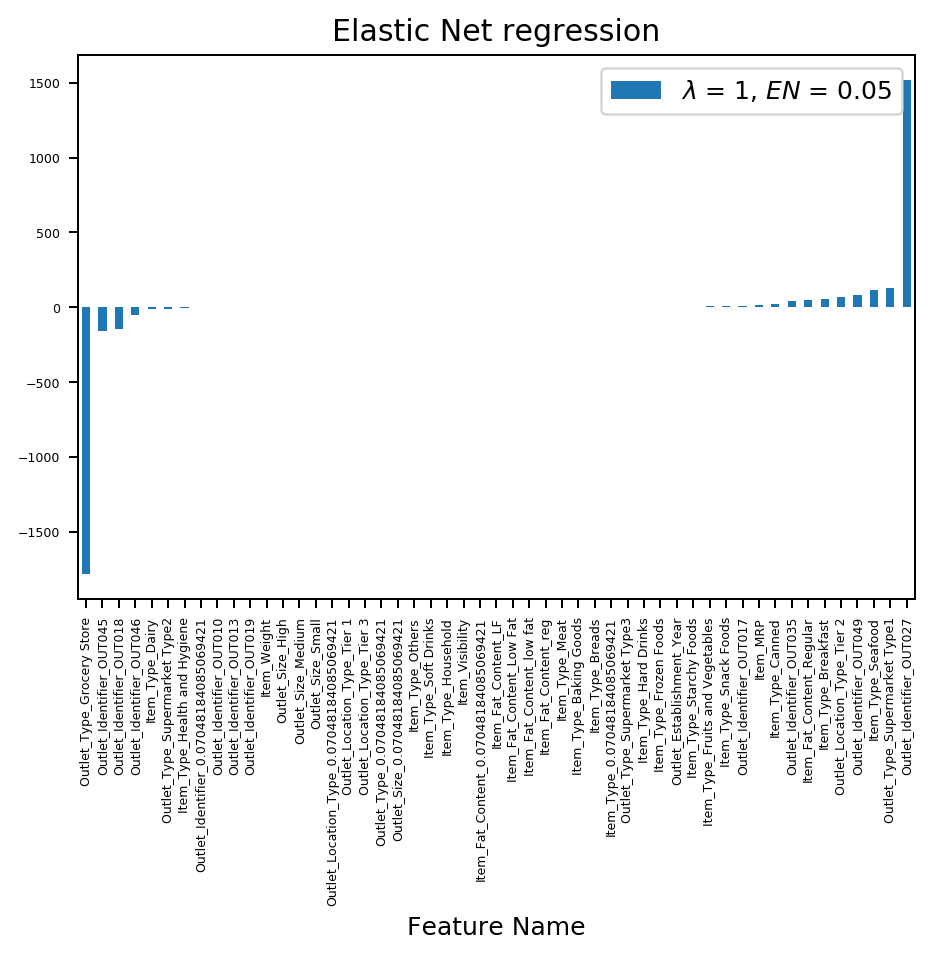

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


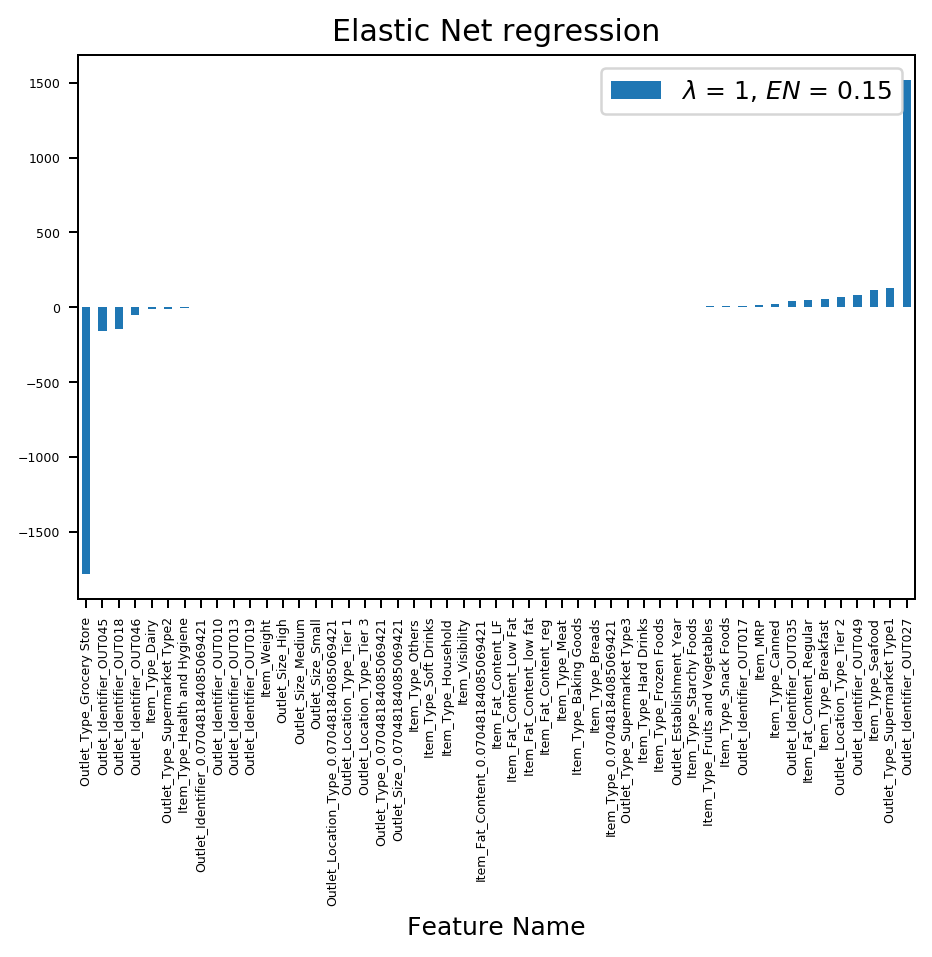

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


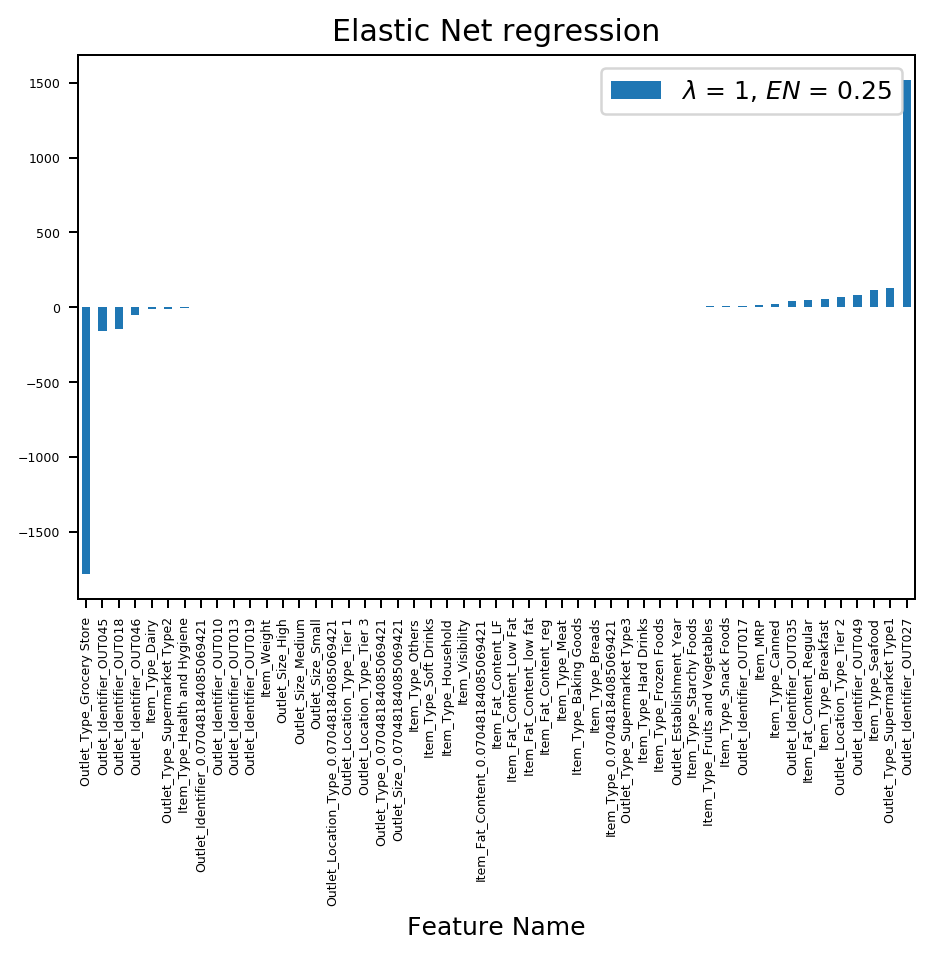

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


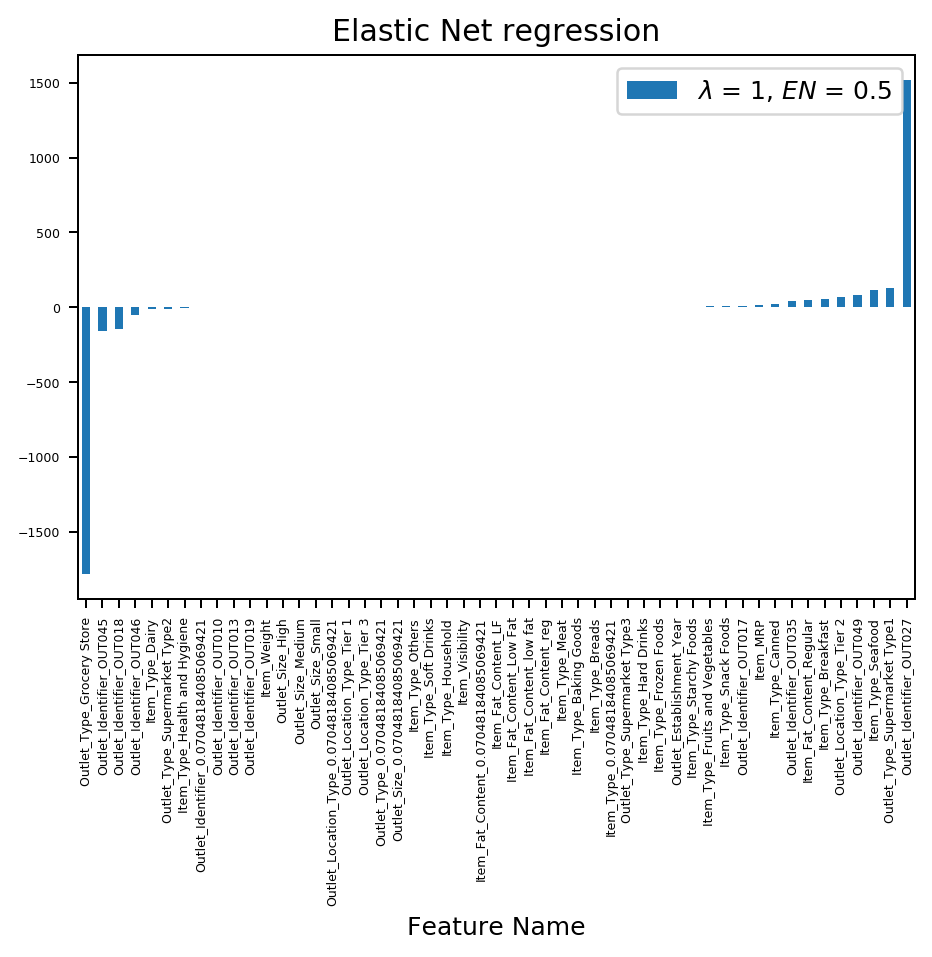

Mean squared error: 1226873.79
Coefficient of determination (R2): 0.61
Min - Max values: [-1784.56, 1517.34]


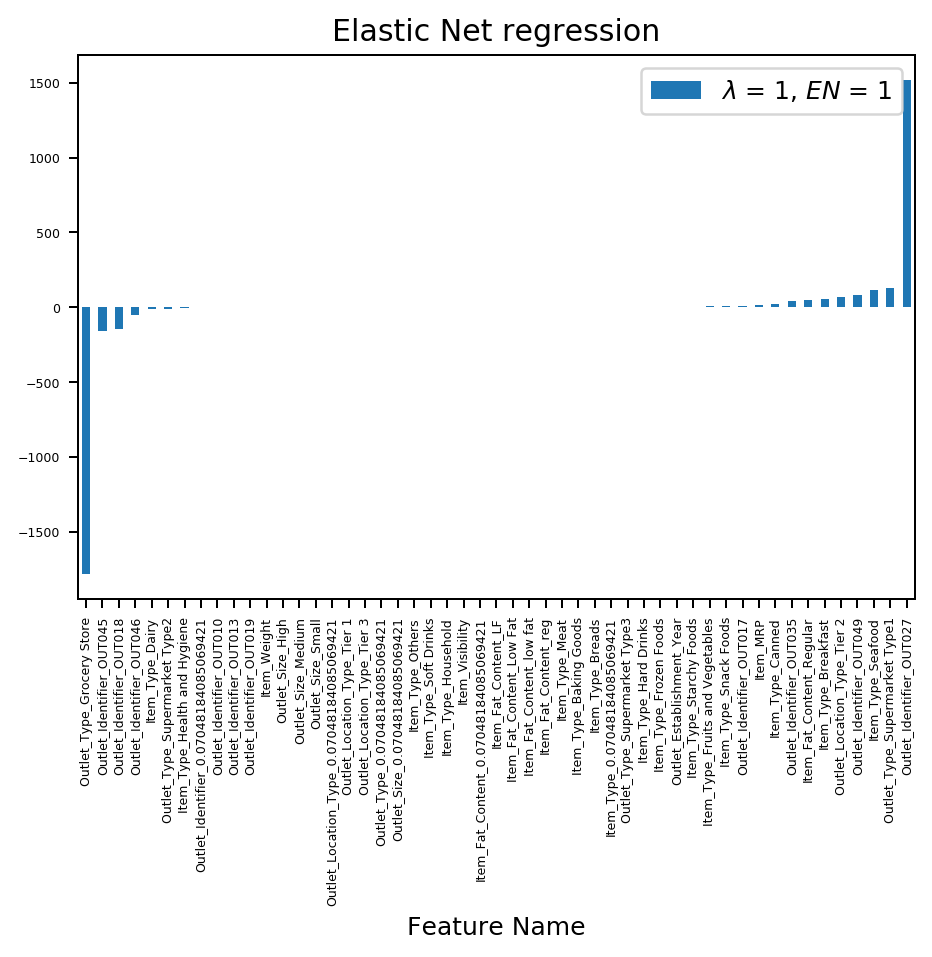

In [195]:
alpha = 1
ElasticNdet_weight_vals = [0, 0.02, 0.05, 0.15, 0.25, 0.5, 1]


# to fix the scale of the plot, to appreciate the reduction in weight magnitude
weights_max = int(OLS.coef_.max())
weights_min = int(OLS.coef_.min())

print('Min - max:', weights_min, weights_max)

for EN_weight in ElasticNdet_weight_vals:
    
    # Create Elastic Net regression object
    ElasticNet = linear_model.ElasticNet(alpha=alpha, 
                                         l1_ratio=Lasso_weight, normalize=False)
    
    # Train the model using the training sets
    ElasticNet.fit(X_train, Y_train)
    
    targets_pred = ElasticNet.predict(X_test)

    # The mean squared error
    print('Mean squared error: {:.2f}'.format(mean_squared_error(Y_test, targets_pred)))
                                                        
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination (R2): {:.2f}'.format(r2_score(Y_test, targets_pred)))

    print('Min - Max values: [{:.2f}, {:.2f}]'.format(ElasticNet.coef_.min(), 
                                                      ElasticNet.coef_.max()))

    weights['Weight Estimate'] = pd.Series(ElasticNet.coef_)
    
    weights_sorted = weights.sort_values(by=['Weight Estimate'])


    weights_sorted.plot(0, 1, kind='bar', title='Feature weights', fontsize=5, 
                        label='$\lambda$ = {}, $EN$ = {}'.format(alpha, EN_weight))
    
    #plt.ylim(weights_min, weights_max)
    
    plt.title('Elastic Net regression')
    plt.legend()
    plt.show()
    